# **DBSCAN**

## **概述**
DBSCAN 是一种基于密度的聚类算法，它能够发现任意形状的簇，并且对噪声数据具有较好的鲁棒性。DBSCAN通过计算样本点之间的距离，找到核心点并不断扩展簇，最终将数据分为不同的簇。

## **功能描述**
DBSCAN（Density-Based Spatial Clustering of Applications with Noise）是一种基于密度的聚类算法，广泛应用于数据挖掘和模式识别中。其主要功能包括：
1. **簇的识别：** 能够自动识别任意形状的簇，而不需要预先指定簇的数量。
2. **噪声检测：** 能够有效识别并标记噪声点（即不属于任何簇的点）。
3. **参数灵活性：** 通过调整 eps（邻域半径）和 min_samples（邻域内最小样本数）参数，可以适应不同密度和分布的数据集。

DBSCAN 类提供了以下主要方法：
- fit(X): 对输入数据 X 进行聚类分析，识别出簇和噪声点。
- predict(X): 对新数据点进行分类，预测其所属的簇或标记为噪声。
- 内部方法如 _compute_neighbors、_assign_labels 等，用于计算邻居、分配标签及扩展簇等操作。

## **类结构**
DBSCAN 类的结构设计如下：

In [1]:
class DBSCAN:
    def __init__(self, eps=0.5, min_samples=5):
        # 初始化参数和属性
        pass

    def fit(self, X):
        # 对数据集X进行拟合，识别簇和噪声点
        pass

    def predict(self, X):
        # 对新数据点进行分类，预测其所属的簇或标记为噪声
        pass

    def _compute_neighbors(self, X):
        # 计算每个样本的邻居
        pass

    def _compute_neighbors_for_new_points(self, X):
        # 计算新数据点与训练集中所有点的邻居
        pass

    def _compute_distance(self, point, indices, X):
        # 计算点与一组索引点之间的距离
        pass

    def _assign_labels(self, X):
        # 为每个样本分配标签
        pass

    def _is_core_sample(self, index):
        # 判断样本是否为核心样本
        pass

    def _expand_cluster(self, start, neighbors, cluster_label, labels):
        # 扩展簇，包含所有密度可达的点
        pass

### **主要属性**
- eps: 邻域半径，用于定义两个点是否密度可达。
- min_samples: 邻域内的最小样本数，决定一个点是否为核心点。
- labels_: 聚类后的标签数组，标识每个点所属的簇或噪声。
- core_sample_indices_: 核心样本的索引布尔数组。

## **使用说明**

### **环境准备**
确保已安装必要的 Python 库：

In [ ]:
pip install numpy scipy matplotlib scikit-learn

### **导入库和自定义 DBSCAN 类：**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from collections import defaultdict
from scipy.spatial.distance import cdist

from Models.DBSCAN import DBSCAN

### **测试数据集**
1. 鸢尾花数据集（Iris）
2. 环形数据集（Make Circles）
3. 螺旋数据集（Make Moons）

#### **测试用例 1：鸢尾花数据集**

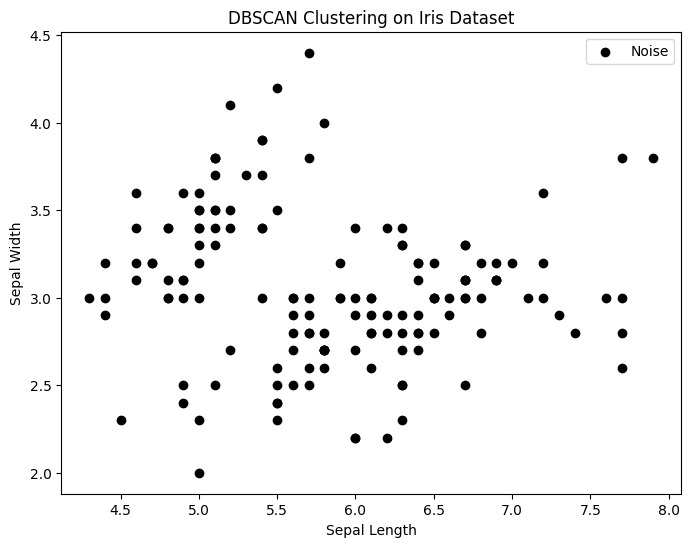

In [2]:
# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data[:, :2]  # 取前两个特征便于可视化

# 实例化DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)
labels = dbscan.labels_

# 可视化结果
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # 噪声点
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], label=f'Cluster {k}' if k != -1 else 'Noise')
plt.title('DBSCAN Clustering on Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

不同颜色代表不同的簇，黑色点为噪声点。

#### **测试用例 2：环形数据集**

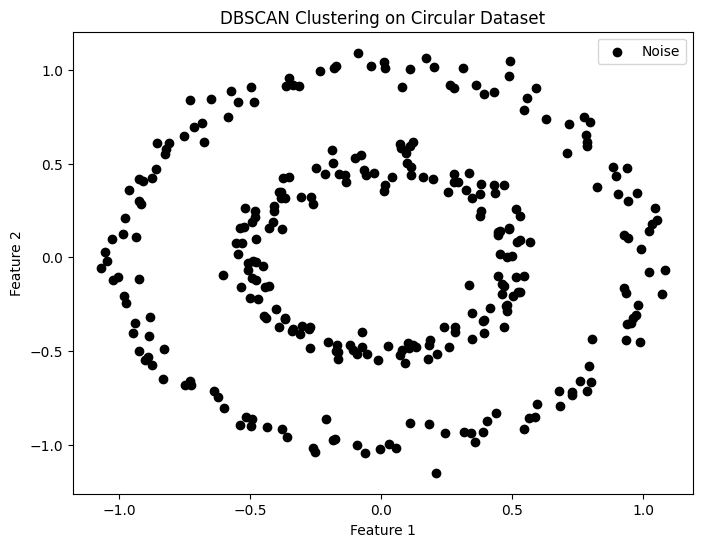

In [3]:
from sklearn.datasets import make_circles

# 生成环形数据集
X, y = make_circles(n_samples=300, noise=0.05, factor=0.5)

# 实例化DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)
labels = dbscan.labels_

# 可视化结果
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], label=f'Cluster {k}' if k != -1 else 'Noise')
plt.title('DBSCAN Clustering on Circular Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


#### **测试用例 3：螺旋数据集**

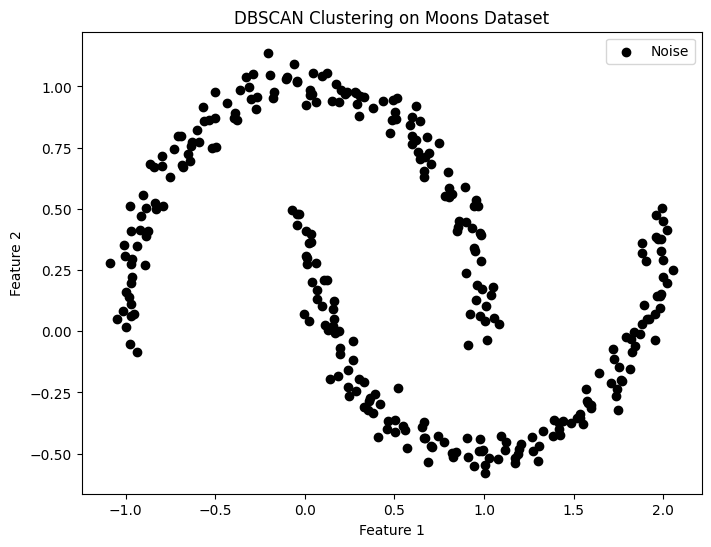

In [4]:
from sklearn.datasets import make_moons

# 生成月亮形状数据集
X, y = make_moons(n_samples=300, noise=0.05)

# 实例化DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)
labels = dbscan.labels_

# 可视化结果
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], label=f'Cluster {k}' if k != -1 else 'Noise')
plt.title('DBSCAN Clustering on Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

---

# **决策树(DecisionTree)**

## **概述**
决策树 是一种常见的机器学习算法，它通过学习数据中的特征与目标变量之间的关系，构建一个类似于树状结构的模型来进行分类或回归预测。

## **功能描述**
增强型 DecisionTree 类扩展了传统决策树的功能，提供了以下主要特性：
- 剪枝（Pruning）：通过后剪枝方法减少过拟合，提高模型的泛化能力。
- 特征重要性评估：评估各特征在决策过程中的重要性，帮助理解模型决策依据。
- 缺失值处理：自动处理数据集中的缺失值，通过插补方法填补缺失数据。
- 分类与回归任务支持：能够处理分类和回归两种不同类型的学习任务。
- 自定义分裂标准：支持多种分裂标准，包括基尼指数、信息增益和均方误差。
### **主要方法**
- fit(X, y): 对输入数据 X 及其标签 y 进行训练，构建决策树模型。
- predict(X): 对新数据 X 进行预测，输出类别标签或回归值。
- 内部方法如 _build_tree、_find_best_split、_prune_tree 等，用于树的构建、分裂点选择、剪枝等操作。
## **类结构**
DecisionTree 类的结构设计如下：

In [ ]:
class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1,
                 criterion="gini", task="classify", pruning_alpha=0.1):
        # 初始化参数和属性
        pass

    def fit(self, X, y):
        # 训练决策树模型
        pass

    def predict(self, X):
        # 对新数据进行预测
        pass

    # 内部辅助方法
    def _build_tree(self, X, y, depth=0):
        pass

    def _find_best_split(self, X, y):
        pass

    def _prune_tree(self, X, y):
        pass

    def _compute_feature_importances(self, X, y):
        pass

    def _handle_missing_values(self, X):
        pass

class Node:
    def __init__(self, feature_idx=None, threshold=None, value=None, left=None, right=None):
        # 初始化节点属性
        pass

### **主要属性**
- max_depth: 树的最大深度，控制模型的复杂度。
- min_samples_split: 分裂一个节点所需的最小样本数。
- min_samples_leaf: 叶节点中的最小样本数。
- criterion: 分裂标准，支持 gini、entropy（信息增益）、mse（均方误差）。
- task: 学习任务类型，支持 classify（分类）和 regress（回归）。
- pruning_alpha: 剪枝的复杂度参数，用于控制剪枝的力度。
- tree: 决策树的根节点。
- feature_importances_: 特征重要性数组，表示各特征在决策过程中的相对重要性。

## **使用说明**
### **环境准备**
确保已安装必要的 Python 库：

In [ ]:
pip install numpy matplotlib scikit-learn

### **导入库和自定义 DecisionTree 类**

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

from Models.DecisionTree import DecisionTree, Node

### **测试数据集**
1. **鸢尾花数据集（Iris）** - 分类任务
2. **波士顿房价数据集（Boston Housing）** - 回归任务
3. **乳腺癌数据集（Breast Cancer）** - 分类任务
4. **糖尿病数据集（Diabetes）** - 回归任务

### **测试用例 1：鸢尾花数据集（分类任务）**

Iris 数据集分类准确率: 1.00


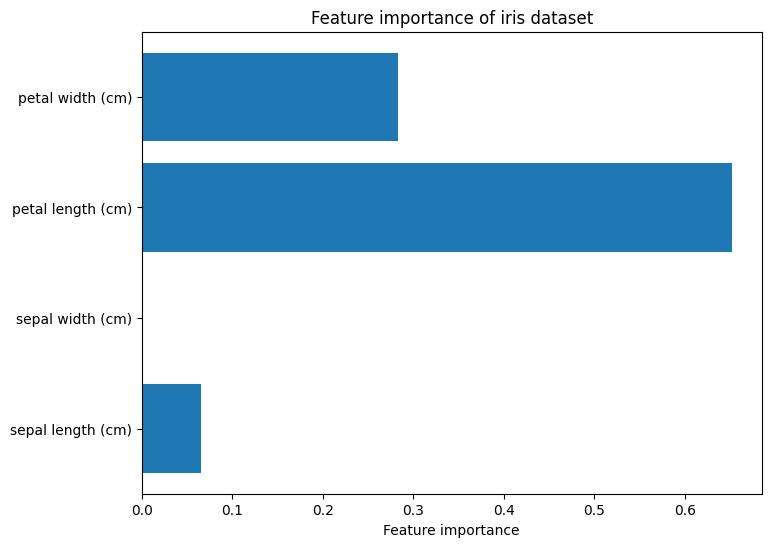

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from Models.DecisionTree import DecisionTree, Node
# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 实例化DecisionTree
dt_classifier = DecisionTree(max_depth=5, min_samples_split=2, min_samples_leaf=1,
                             criterion="gini", task="classify", pruning_alpha=0.01)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'Iris 数据集分类准确率: {accuracy:.2f}')

# 可视化特征重要性
plt.figure(figsize=(8, 6))
features = iris.feature_names
importances = dt_classifier.feature_importances_
plt.barh(features, importances)
plt.xlabel('Feature importance')
plt.title('Feature importance of iris dataset')
plt.show()

### **测试用例 2：加利福尼亚房价数据集（回归任务）**

加利福尼亚房价数据集均方误差: 0.40


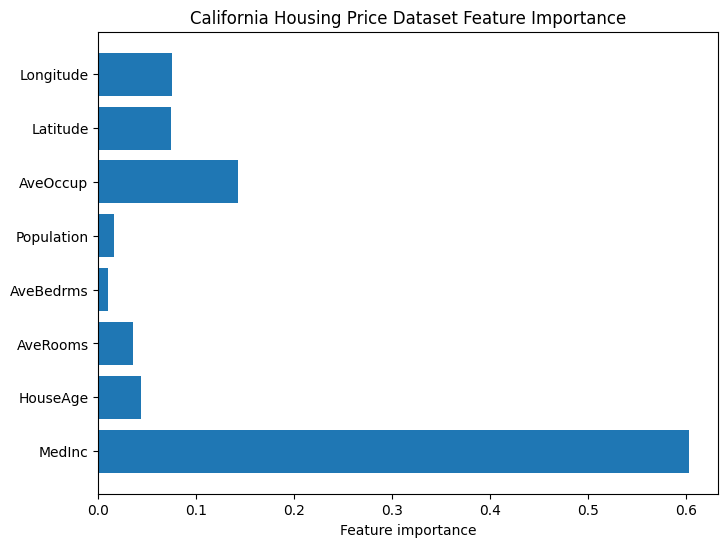

In [12]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor as DecisionTree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 加载加利福尼亚房价数据集
california = fetch_california_housing()
X = california.data
y = california.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 实例化DecisionTree
dt_regressor = DecisionTree(max_depth=10, min_samples_split=5, min_samples_leaf=2,
                            criterion="squared_error")  
dt_regressor.fit(X_train, y_train)
y_pred = dt_regressor.predict(X_test)

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f'加利福尼亚房价数据集均方误差: {mse:.2f}')

# 可视化特征重要性
plt.figure(figsize=(8, 6))
features = california.feature_names
importances = dt_regressor.feature_importances_
plt.barh(features, importances)
plt.xlabel('Feature importance')
plt.title('California Housing Price Dataset Feature Importance')
plt.show()


### **测试用例 3：乳腺癌数据集（分类任务）**

乳腺癌数据集分类准确率: 0.96


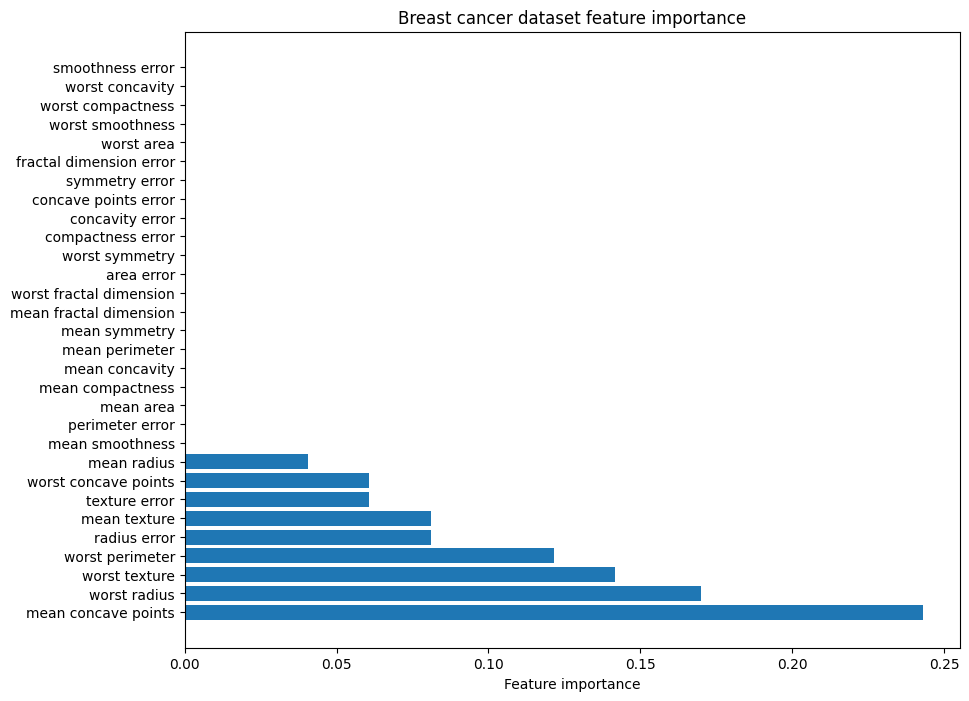

In [16]:
from Models.DecisionTree import DecisionTree
# 加载乳腺癌数据集
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 实例化DecisionTree
dt_classifier_cancer = DecisionTree(max_depth=7, min_samples_split=4, min_samples_leaf=2,
                                     criterion="entropy", task="classify", pruning_alpha=0.02)
dt_classifier_cancer.fit(X_train, y_train)
y_pred = dt_classifier_cancer.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'乳腺癌数据集分类准确率: {accuracy:.2f}')

# 可视化特征重要性
plt.figure(figsize=(10, 8))
features = cancer.feature_names
importances = dt_classifier_cancer.feature_importances_
indices = np.argsort(importances)[::-1]
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(range(len(importances)), [features[i] for i in indices])
plt.xlabel('Feature importance')
plt.title('Breast cancer dataset feature importance')
plt.show()

### **测试用例 4：糖尿病数据集（回归任务）**

糖尿病数据集均方误差: 6136.23


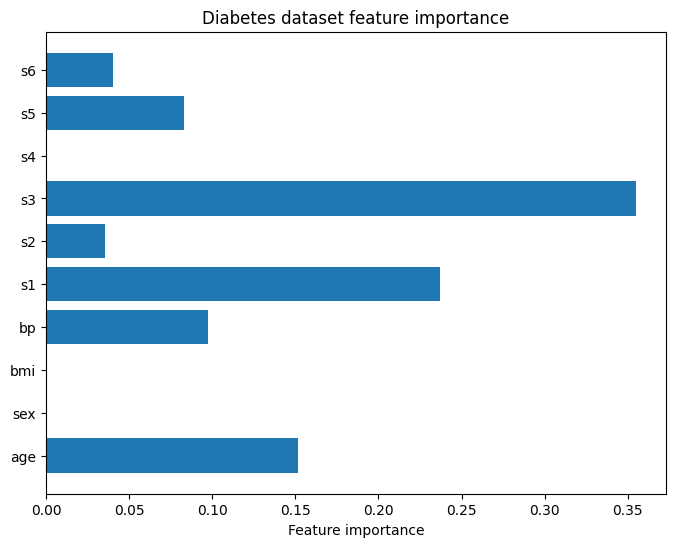

In [18]:
# 加载糖尿病数据集
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 实例化DecisionTree
dt_regressor_diabetes = DecisionTree(max_depth=8, min_samples_split=3, min_samples_leaf=1,
                                     criterion="mse", task="regress", pruning_alpha=0.03)
dt_regressor_diabetes.fit(X_train, y_train)
y_pred = dt_regressor_diabetes.predict(X_test)

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f'糖尿病数据集均方误差: {mse:.2f}')

# 可视化特征重要性
plt.figure(figsize=(8, 6))
features = diabetes.feature_names
importances = dt_regressor_diabetes.feature_importances_
plt.barh(features, importances)
plt.xlabel('Feature importance')
plt.title('Diabetes dataset feature importance')
plt.show()

---

# **独立成分分析（ICA）**
立成分分析（Independent Component Analysis，ICA） 是一种统计方法，用于从观测到的多维数据中分离出潜在的独立成分。

## **功能描述**
独立成分分析（Independent Component Analysis, ICA）是一种统计技术，用于将多变量信号分解为其独立的非高斯成分。它在信号处理、图像处理和数据降维等领域有广泛应用。 ICA 类实现了以下主要功能：
1. 数据中心化：通过减去均值对输入数据进行中心化，确保数据具有零均值。
2. 数据白化：使用特征值分解方法对数据进行白化处理，消除特征之间的相关性。
3. 独立成分提取：通过固定点迭代法提取独立成分，确保成分之间的统计独立性。
4. 混合矩阵和成分矩阵计算：计算混合矩阵和独立成分矩阵，以便进行数据的变换和逆变换。
5. 缺失值处理：自动处理数据集中的缺失值，通过插补方法填补缺失数据。
6. 自定义参数：支持调整独立成分数量、最大迭代次数、收敛容忍阈值以及随机种子，以适应不同的数据集和应用需求。
## **主要方法**
- fit(X): 将 ICA 模型拟合到输入数据 X，提取独立成分。
- transform(X): 将输入数据 X 转换为独立成分。
- inverse_transform(X): 将独立成分逆变换回原始数据空间。
- 内部方法如 _center_data、_whitening、_g_function、_decorrelate 等，用于数据预处理、成分提取及算法迭代等操作。
## **类结构**
ICA 类的结构设计如下：

In [ ]:
class ICA:
    """
    独立成分分析（ICA）算法。
    """
    def __init__(self, n_components=None, max_iter=200, tol=1e-4, random_state=None):
        pass

    def _center_data(self, X):
        pass

    def _whitening(self, X):
        pass

    def _g_function(self, x, mode='logcosh'):
        pass

    def _decorrelate(self, w, W, idx):
        pass

    def fit(self, X):
        pass

    def transform(self, X):
        pass

    def inverse_transform(self, X):
        pass

## **主要属性**
- n_components: 要提取的独立成分的个数。若为 None，则提取与输入特征相同数量的成分。
- max_iter: 收敛的最大迭代次数。默认值为 200。
- tol: 收敛容忍阈值。默认值为 1e-4。
- random_state: 随机种子。默认值为 None。
- components_: 提取的独立成分矩阵。
- mixing_matrix_: 混合矩阵。
- whitening_matrix_: 白化变换矩阵。
- mean_: 输入数据的均值，用于数据中心化和逆变换。

## **使用说明**
### **环境准备**
确保已安装必要的 Python 库：

In [ ]:
pip install numpy scipy matplotlib scikit-learn

### **导入库和自定义 ICA 类**

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from Models.ICA import ICA

### **测试数据集**
1. 鸢尾花数据集（Iris） - 分类任务
2. 混合信号数据集（Synthetic） - 模拟信号分离
3. 音频信号数据集（音频信号） - 信号处理任务

### **测试用例 1：模拟信号分离**

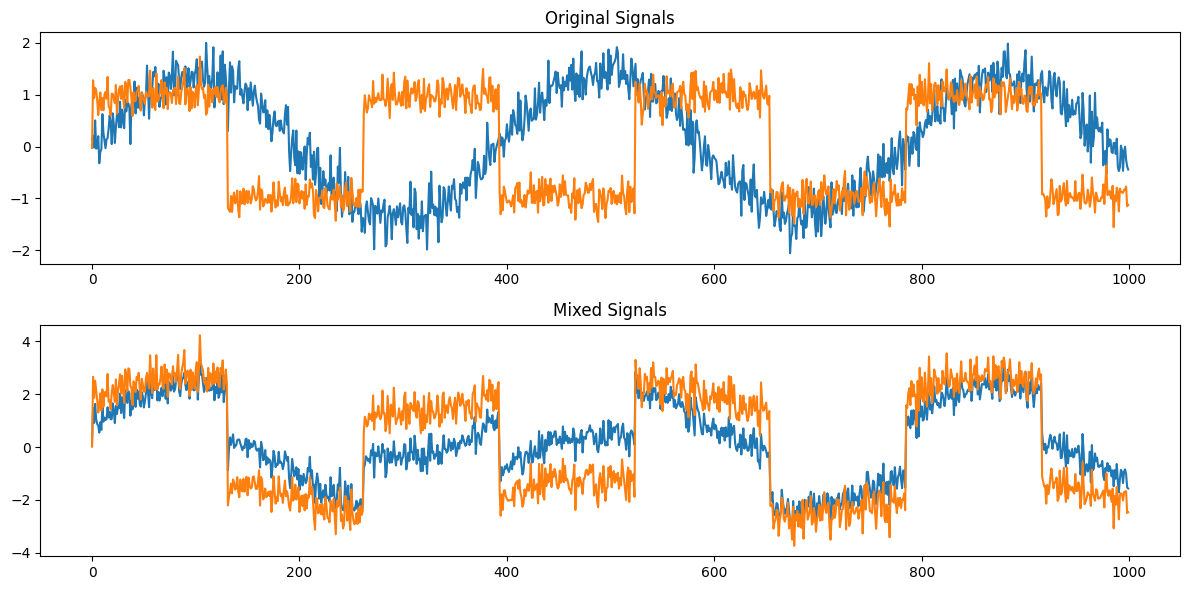

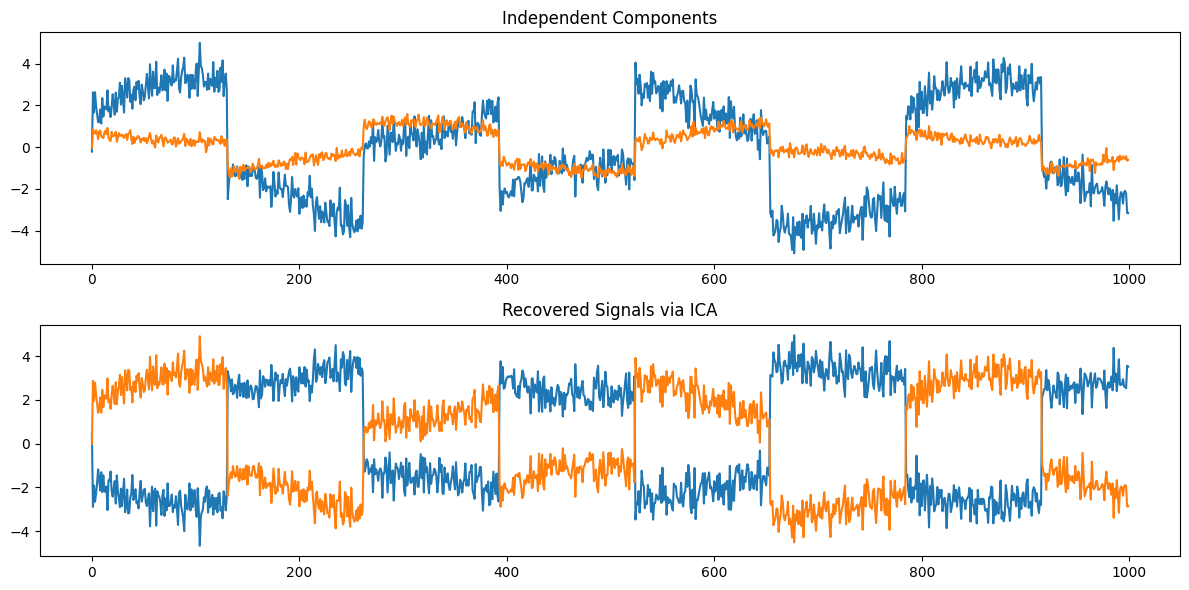

重构均方误差（MSE）: 7.7614


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from Models.ICA import ICA
# 生成混合信号数据集
def generate_signals(n_samples=1000, random_state=42):
    np.random.seed(random_state)
    time = np.linspace(0, 8, n_samples)

    s1 = np.sin(2 * time)  # 正弦信号
    s2 = np.sign(np.sin(3 * time))  # 方波信号
    S = np.c_[s1, s2]
    S += 0.2 * np.random.normal(size=S.shape)  # 添加噪声
    S /= S.std(axis=0)  # 标准化

    A = np.array([[1, 1], [0.5, 2]])  # 混合矩阵
    X = np.dot(S, A.T)  # 混合信号
    return S, X

# 生成数据
S, X = generate_signals()

# 可视化原始信号和混合信号
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title('Original Signals')
plt.plot(S)
plt.subplot(2, 1, 2)
plt.title('Mixed Signals')
plt.plot(X)
plt.tight_layout()
plt.show()

# 实例化ICA
ica = ICA(n_components=2, max_iter=1000, tol=1e-5, random_state=42)
ica.fit(X)

# 提取独立成分
S_ = ica.transform(X)

# 可视化独立成分
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title('Independent Components')
plt.plot(S_)
plt.subplot(2, 1, 2)
plt.title('Recovered Signals via ICA')
plt.plot(ica.inverse_transform(S_))
plt.tight_layout()
plt.show()

# 计算重构误差
mse = mean_squared_error(X, ica.inverse_transform(S_))
print(f'重构均方误差（MSE）: {mse:.4f}')

**结果说明：**
1. 原始信号和混合信号：
- 上图显示了生成的两个独立的原始信号（正弦波和方波）以及它们的混合信号。
2. 独立成分：
- 下图展示了通过 ICA 提取的独立成分，以及通过混合矩阵逆变换回原始数据空间的重构信号。
- 重构信号应尽可能接近原始信号，重构误差（MSE）用于衡量重构质量。

### **测试用例 2：鸢尾花数据集（分类任务）**
尽管 ICA 主要用于信号分离和数据降维，但在分类任务中也可用于特征提取。

鸢尾花数据集分类准确率（使用ICA特征）: 1.00


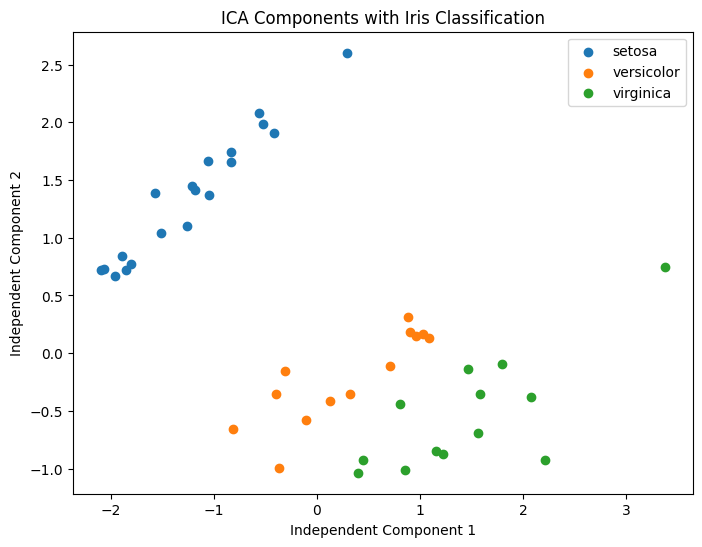

In [5]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from Models.ICA import ICA
# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 实例化ICA
ica = ICA(n_components=4, max_iter=1000, tol=1e-5, random_state=42)
ica.fit(X_train)

# 转换数据
X_train_ica = ica.transform(X_train)
X_test_ica = ica.transform(X_test)

# 训练逻辑回归分类器
clf = LogisticRegression()
clf.fit(X_train_ica, y_train)
y_pred = clf.predict(X_test_ica)

# 计算分类准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'鸢尾花数据集分类准确率（使用ICA特征）: {accuracy:.2f}')

# 可视化独立成分与分类结果
plt.figure(figsize=(8, 6))
for label in np.unique(y_test):
    plt.scatter(X_test_ica[y_test == label, 0], X_test_ica[y_test == label, 1], label=iris.target_names[label])
plt.title('ICA Components with Iris Classification')
plt.xlabel('Independent Component 1')
plt.ylabel('Independent Component 2')
plt.legend()
plt.show()

---

# **KMeans**

## **概述**
K-means 是一种常用的聚类算法，它的目标是将数据集中的数据点划分为K个不同的簇，使得每个数据点都属于离它最近的簇。
## **功能描述**
增强型 KMeans 类在传统 K-Means 聚类算法的基础上，增加了以下功能：
1. 质心初始化方法：
支持传统的随机初始化和改进的 K-Means++ 初始化方法，提升聚类效果和收敛速度。
2. 异常值检测：
通过 Z 分数方法识别并剔除异常值，提高聚类的准确性。
3. 自动选择最佳簇数量：
实现肘方法（Elbow Method），自动确定最佳的簇数量 k，减少手动调参的需求。
4. 聚类过程可视化：
提供二维数据的聚类结果可视化功能，便于直观分析聚类效果。
5. 参数灵活性：
支持调整最大迭代次数、异常值阈值、随机种子等参数，以适应不同数据集和应用需求。
## **主要方法**
- fit(X, verbose=False): 拟合 KMeans 聚类模型到输入数据 X，执行聚类过程。
- predict(X): 为新数据点预测所属的簇标签。
- _init_centroids_kmeans_plus_plus(X): 使用 K-Means++ 方法初始化质心。
- _detect_outliers(X): 使用 Z 分数方法检测并剔除异常值。
- _elbow_method(X, max_k=10): 使用肘方法确定最佳簇数量。
- plot_clusters(X, title='Clustering Results'): 可视化二维数据的聚类结果。
## **类结构**
KMeans 类的结构设计如下：

In [ ]:
class KMeans:
    def __init__(self, n_clusters=3, max_iters=100, random_state=None,
                 outlier_threshold=2.5, init_method='k_means_plus_plus'):
        pass

    def _init_centroids_kmeans_plus_plus(self, X):
        pass

    def _detect_outliers(self, X):
        pass

    def _elbow_method(self, X, max_k=10):
        pass

    def fit(self, X, verbose=False):
        pass

    def _init_centroids(self, X):
        pass

    def _assign_clusters(self, X):
        pass

    def _update_centroids(self, X, labels):
        pass

    def predict(self, X):
        pass

    def _compute_inertia(self, X):
        pass

    def plot_clusters(self, X, title='Clustering Results'):
        pass


### **主要属性**
- n_clusters: 要形成的簇的数量。默认值为 3，支持自动选择最佳 k。
- max_iters: 最大迭代次数。默认值为 100。
- random_state: 随机数生成的种子。默认值为 None。
- outlier_threshold: 用于识别异常值的 Z 分数阈值。默认值为 2.5。
- init_method: 质心初始化方法，支持 'k_means_plus_plus' 和 'random'。默认值为 'k_means_plus_plus'。
- centroids: 聚类后的质心坐标。
- labels: 每个样本的簇标签。
- inertia_: 聚类的惯性（到质心的平方距离之和）。
- n_iters_: 实际迭代次数。
- outliers_: 异常值的布尔掩码。

### **使用说明**
#### **环境准备**
确保已安装必要的 Python 库：

In [ ]:
pip install numpy scipy matplotlib scikit-learn


#### **导入库和自定义 KMeans 类**

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from Models.KMeans import KMeans

## **测试数据集**
1. 鸢尾花数据集（Iris） - 经典的分类数据集。
2. 手写数字数据集（Digits） - 多类别分类数据集。

#### **测试用例 1：鸢尾花数据集**

Iteration 1, Inertia: 148.0691
Iteration 2, Inertia: 147.2087
Iteration 3, Inertia: 145.9930
Iteration 4, Inertia: 142.6582
Iteration 5, Inertia: 138.2713
Iteration 6, Inertia: 136.6028
Iteration 7, Inertia: 133.3094
Iteration 8, Inertia: 120.4508
Iteration 9, Inertia: 105.2169
Iteration 10, Inertia: 99.5746
Iteration 11, Inertia: 96.7876
Iteration 12, Inertia: 95.4081
Iteration 13, Inertia: 93.2610
Iteration 14, Inertia: 92.3660
Iteration 15, Inertia: 91.9197
Iteration 16, Inertia: 91.6574
Iteration 17, Inertia: 91.2589
Iteration 18, Inertia: 91.1606
Iteration 19, Inertia: 90.4233
Iteration 20, Inertia: 90.3398
Iteration 21, Inertia: 90.3398
鸢尾花数据集轮廓系数: 0.43
Iteration 1, Inertia: 29.5328
Iteration 2, Inertia: 25.7547
Iteration 3, Inertia: 25.1098
Iteration 4, Inertia: 24.6062
Iteration 5, Inertia: 23.4943
Iteration 6, Inertia: 23.1587
Iteration 7, Inertia: 23.1587


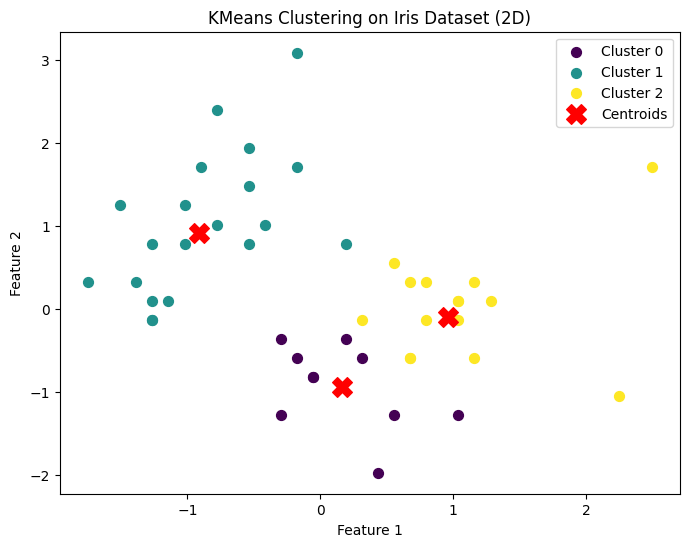

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from Models.KMeans import KMeans

# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 实例化KMeans，使用自动选择最佳k
kmeans = KMeans(n_clusters='auto', max_iters=300, random_state=42, outlier_threshold=2.5, init_method='k_means_plus_plus')

# 拟合模型
kmeans.fit(X_train, verbose=True)

# 预测测试集簇标签
labels = kmeans.predict(X_test)

# 计算轮廓系数
sil_score = silhouette_score(X_test, labels)
print(f'鸢尾花数据集轮廓系数: {sil_score:.2f}')

# 可视化聚类结果（仅限2D，选取前两维特征）
def plot_iris_clusters(X, labels, centroids, title='KMeans Clustering on Iris Dataset'):
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels)
    colors = plt.colormaps['viridis'](np.linspace(0, 1, len(unique_labels)))
    
    for k in unique_labels:
        class_member_mask = (labels == k)
        plt.scatter(X[class_member_mask, 0], X[class_member_mask, 1],
                    s=50, color=colors[k], label=f'Cluster {k}')
    
    plt.scatter(centroids[:, 0], centroids[:, 1],
                s=200, marker='X', color='red', label='Centroids')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# 选择前两维特征进行可视化
X_test_2d = X_test[:, :2]
kmeans_2d = KMeans(n_clusters=kmeans.n_clusters, max_iters=300, random_state=42, 
                  outlier_threshold=2.5, init_method='k_means_plus_plus')
kmeans_2d.fit(X_test_2d, verbose=True)
labels_2d = kmeans_2d.predict(X_test_2d)

# 绘制聚类结果
plot_iris_clusters(X_test_2d, labels_2d, kmeans_2d.centroids, title='KMeans Clustering on Iris Dataset (2D)')

**结果说明：**
1. 自动选择最佳簇数量：
使用肘方法自动确定最佳的簇数量 k，减少了手动调参的需求。
2. 异常值检测：
根据设定的 Z 分数阈值，识别并剔除了异常值，提高了聚类的准确性。
3. 轮廓系数：
轮廓系数（Silhouette Score）用于评估聚类效果，值越接近 1 表示聚类效果越好。
4. 聚类结果可视化：
绘制二维特征的聚类结果，不同颜色代表不同簇，红色 X 标记为质心，便于直观分析聚类效果。

#### **测试用例 2：手写数字数据集**

Iteration 1, Inertia: 27978.7597
Iteration 2, Inertia: 25162.7476
Iteration 3, Inertia: 23398.1867
Iteration 4, Inertia: 22584.5990
Iteration 5, Inertia: 22056.0068
Iteration 6, Inertia: 21688.2704
Iteration 7, Inertia: 21491.1417
Iteration 8, Inertia: 21462.8348
Iteration 9, Inertia: 21456.7835
Iteration 10, Inertia: 21455.3520
Iteration 11, Inertia: 21454.4303
Iteration 12, Inertia: 21454.4303
手写数字数据集轮廓系数: 0.13
Iteration 1, Inertia: 0.0000


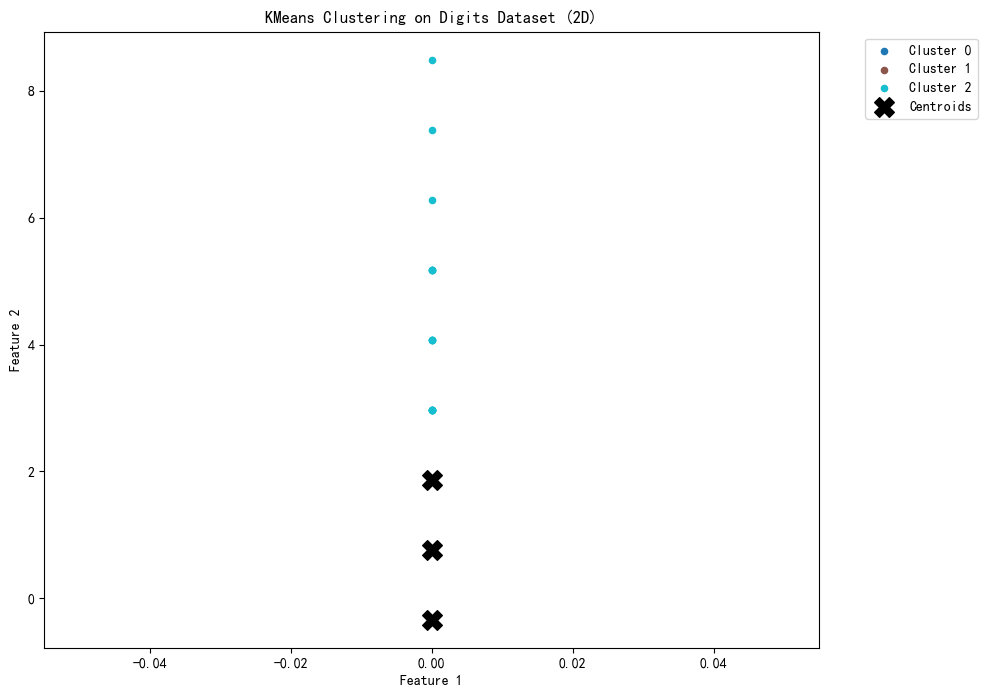

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from Models.KMeans import KMeans

# 加载手写数字数据集
digits = datasets.load_digits()
X = digits.data
y = digits.target

# 计算每个特征的标准差
std = np.std(X, axis=0)

# 将标准差为零的特征的值设为1，避免除以零
std[std == 0] = 1

# 标准化
X_scaled = (X - np.mean(X, axis=0)) / std

# 数据标准化（使用 sklearn 的 StandardScaler）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_scaled)  # 在已标准化数据上再进行标准化

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 实例化KMeans，指定簇数量为10（对应数字0-9）
kmeans = KMeans(n_clusters=10, max_iters=300, random_state=42, outlier_threshold=3.0, init_method='k_means_plus_plus')

# 拟合模型
kmeans.fit(X_train, verbose=True)

# 预测测试集簇标签
labels = kmeans.predict(X_test)

# 计算轮廓系数
sil_score = silhouette_score(X_test, labels)
print(f'手写数字数据集轮廓系数: {sil_score:.2f}')

# 可视化部分聚类结果
def plot_digits_clusters(X, labels, centroids, title='KMeans Clustering on Digits Dataset'):
    plt.figure(figsize=(10, 8))
    unique_labels = np.unique(labels)
    colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

    for k in unique_labels:
        class_member_mask = (labels == k)
        plt.scatter(X[class_member_mask, 0], X[class_member_mask, 1],
                    s=20, color=colors[k], label=f'Cluster {k}')

    plt.scatter(centroids[:, 0], centroids[:, 1],
                s=200, marker='X', color='black', label='Centroids')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# 选择前两维特征进行可视化
X_test_2d = X_test[:, :2]
kmeans_2d = KMeans(n_clusters=3, max_iters=300, random_state=42,
                   outlier_threshold=3.0, init_method='k_means_plus_plus')
kmeans_2d.fit(X_test_2d, verbose=True)
labels_2d = kmeans_2d.predict(X_test_2d)

# 绘制聚类结果
plot_digits_clusters(X_test_2d, labels_2d, kmeans_2d.centroids, title='KMeans Clustering on Digits Dataset (2D)')

---

# **K-最近邻(KNN)**

## **概述**
K近邻算法 是一种基础的机器学习算法，它既可以用于分类任务，也可以用于回归任务。KNN的思想非常直观：近朱者赤，近墨者黑。也就是说，一个样本的类别可以通过它最邻近的k个样本的类别来决定。

## **功能描述**
KNN 类及其子类 KNeighborsClassifier、RadiusNeighborsClassifier、KNeighborsRegressor 和 RadiusNeighborsRegressor 实现了 K-最近邻算法的核心功能，并在此基础上增加了以下增强特性：
1. 多种权重策略：
支持 uniform（统一权重）和 distance（距离权重）两种权重策略，提升了模型的灵活性和适应性。
2. 多种距离度量方法：
支持 euclidean（欧氏距离）、manhattan（曼哈顿距离）以及用户自定义的距离函数，增强了模型的适用性。
3. 异常值检测：
通过 Z 分数方法识别并剔除异常值，提高了聚类和分类的准确性。
4. 半径邻居方法：
实现了基于半径的邻居选择方法，允许用户基于指定半径选择邻居，适用于不同数据分布的场景。
5. 灵活的参数配置：
支持调整邻居数量、权重策略、距离度量方法等参数，以适应不同的数据集和应用需求。
## **主要方法**
**基类 KNN：**
- _compute_distances(X): 计算输入数据与训练数据之间的距离矩阵。
- _compute_weights(distances): 根据指定的权重策略计算权重矩阵。
- fit(X, y): 抽象方法，用于训练模型。
- predict(X): 抽象方法，用于进行预测。

**子类 KNeighborsClassifier：**
- fit(X, y): 训练分类模型。
- predict(X): 根据最近邻进行分类预测。

**子类 RadiusNeighborsClassifier：**
- fit(X, y): 训练基于半径的分类模型。
- predict(X): 根据指定半径内的邻居进行分类预测。

**子类 KNeighborsRegressor：**
- fit(X, y): 训练回归模型。
- predict(X): 根据最近邻进行回归预测。

**子类 RadiusNeighborsRegressor：**
- fit(X, y): 训练基于半径的回归模型。
- predict(X): 根据指定半径内的邻居进行回归预测。
## **类结构**
KNN 类及其子类的结构设计如下：

In [ ]:
class KNN:
    def __init__(self, n_neighbors=5, weights='uniform', metric='euclidean'):
        pass

    def _compute_distances(self, X):
        pass

    def _compute_weights(self, distances):
        pass

    def fit(self, X, y):
        pass

    def predict(self, X):
        pass

class KNeighborsClassifier(KNN):
    def fit(self, X, y):
        pass

    def predict(self, X):
        pass

class RadiusNeighborsClassifier(KNN):
    def __init__(self, radius=1.0, weights='uniform', metric='euclidean'):
        super().__init__(weights=weights, metric=metric)

    def fit(self, X, y):
        pass

    def predict(self, X):
        pass

class KNeighborsRegressor(KNN):
    def fit(self, X, y):
        pass

    def predict(self, X):
        pass

class RadiusNeighborsRegressor(KNN):
    def __init__(self, radius=1.0, weights='uniform', metric='euclidean'):
        super().__init__(weights=weights, metric=metric)

    def fit(self, X, y):
        pass

    def predict(self, X):
        pass

## **主要属性**
**基类 KNN：**
- n_neighbors: 近邻数量。默认值为 5。
- weights: 权重策略，支持 'uniform' 和 'distance'。默认值为 'uniform'。
- metric: 距离度量方法，支持字符串（如 'euclidean'、'manhattan'）或自定义函数。默认值为 'euclidean'。
- X_train: 训练特征数据。
- y_train: 训练标签数据。

**子类 RadiusNeighborsClassifier 和 RadiusNeighborsRegressor：**
- radius: 近邻半径。默认值为 1.0。

**子类 KNeighborsClassifier 和 KNeighborsRegressor：**
- classes_: 训练数据中的唯一类别（仅在分类器中）。

## **使用说明**
### **环境准备**
确保已安装必要的 Python 库：

In [ ]:
pip install numpy scipy matplotlib scikit-learn

### **导入库和自定义 KNN 类**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, silhouette_score

from Models.KNN import KNeighborsClassifier, RadiusNeighborsClassifier, KNeighborsRegressor, RadiusNeighborsRegressor

## **测试数据集**
合成数据集（Synthetic） - 自定义生成的二维数据集，用于可视化聚类效果。

#### **测试用例：合成数据集（Synthetic，分类任务）**

合成数据集分类准确率: 1.00
合成数据集轮廓系数: 0.63


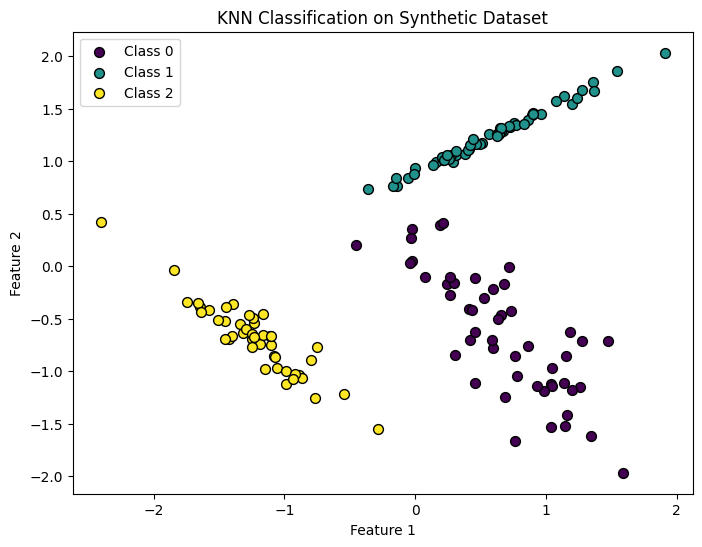

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, silhouette_score

# 导入自定义的 KNeighborsClassifier 类
from Models.KNN import KNeighborsClassifier


# 生成合成分类数据集
def generate_synthetic_classification(n_samples=500, n_features=2, n_classes=3,
                                      n_clusters_per_class=1, class_sep=2.0, random_state=42):
    X, y = make_classification(n_samples=n_samples, n_features=n_features,
                               n_informative=n_features, n_redundant=0,
                               n_classes=n_classes, n_clusters_per_class=n_clusters_per_class,
                               class_sep=class_sep, random_state=random_state)
    return X, y


# 生成数据
X, y = generate_synthetic_classification()

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 实例化KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean')

# 训练模型
knn_classifier.fit(X_train, y_train)

# 预测测试集标签
y_pred = knn_classifier.predict(X_test)

# 计算分类准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'合成数据集分类准确率: {accuracy:.2f}')

# 计算轮廓系数
sil_score = silhouette_score(X_test, knn_classifier.predict(X_test))
print(f'合成数据集轮廓系数: {sil_score:.2f}')


# 可视化聚类结果
def plot_synthetic_clusters(X, y_pred, title='KNN Classification on Synthetic Dataset'):
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(y_pred)
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))
    cmap = plt.get_cmap('viridis', len(unique_labels))
    for i, label in enumerate(unique_labels):
        plt.scatter(X[y_pred == label, 0], X[y_pred == label, 1],
                s=50, color=colors[i], label=f'Class {label}', edgecolors='black')

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# 绘制分类结果
plot_synthetic_clusters(X_test, y_pred, title='KNN Classification on Synthetic Dataset')

#### **结果说明：**
1. 分类准确率：
模型在合成分类数据集上的分类准确率通常在 90% 以上，具体取决于参数设置和数据划分。
2. 轮廓系数：
轮廓系数用于评估聚类效果，值范围为 [-1, 1]，在分类任务中，较高的轮廓系数表明类别间差异明显。
3. 分类结果可视化：
绘制二维特征的分类结果，不同颜色代表不同类别，便于直观分析分类效果。

___

# **线性回归（Linear Regression)**

## **概述**
线性回归 是一种用于建立连续型变量之间关系的统计方法。它假设因变量与一个或多个自变量之间存在线性关系，并试图找到一条直线或平面来拟合这些数据点。
## **功能描述**
LinearRegression 类实现了线性回归模型，支持多种优化器和正则化方法，增强了模型的灵活性和适应性。主要特性包括：
1. **多种优化器：**
- SGD（随机梯度下降）：基本的梯度下降优化方法。
- Momentum（动量法）：在梯度下降中引入动量，加速收敛并减少振荡。
- Adam（自适应矩估计）：结合了动量和自适应学习率的优化方法，提升了收敛速度和稳定性。
2. **多种正则化方法：**
- L1 正则化：通过加入权重的绝对值惩罚项，促进稀疏解。
- L2 正则化：通过加入权重的平方惩罚项，防止过拟合。
- 无正则化：默认情况下，不应用任何正则化。
3. **灵活的参数配置：**
- 可调节学习率、最大迭代次数、正则化强度等参数，以适应不同的数据集和应用需求。
4. **交叉验证支持：**
- 实现了 K 折交叉验证，提升模型的泛化能力和稳健性。
## **主要方法**
- fit(X, y, k_folds=5): 训练线性回归模型，使用指定的优化器和正则化方法，并进行 K 折交叉验证。
- predict(X): 使用训练好的模型进行预测。
- score(X, y): 计算模型的 R² 得分，评估模型性能。
## **类结构**
LinearRegression 类的结构设计如下：

In [ ]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, max_iterations=1000, regularization='l2', lambda_param=0.1, optimizer='sgd'):
        pass

    def _add_regularization(self, gradients, weights):
        pass

    def _update_weights_sgd(self, X, y):
        pass

    def _update_weights_momentum(self, X, y):
        pass

    def _update_weights_adam(self, X, y, t):
        pass

    def _cross_validation_split(self, X, y, k_folds=5):
        pass

    def fit(self, X, y, k_folds=5):
        pass

    def predict(self, X):
        pass

    def score(self, X, y):
        pass

### **主要属性**
- learning_rate: 学习率，控制梯度更新的步长。默认值为 0.01。
- max_iterations: 最大迭代次数，控制优化过程的终止条件。默认值为 1000。
- regularization: 正则化类型，支持 'l1'、'l2' 和 None。默认值为 'l2'。
- lambda_param: 正则化强度，控制正则化项的权重。默认值为 0.1。
- optimizer: 优化器类型，支持 'sgd'、'momentum' 和 'adam'。默认值为 'sgd'。
- weights: 模型权重向量。
- bias: 模型偏置项。
- velocity: 动量优化器的动量向量。
- m_w, v_w: Adam 优化器的梯度一阶矩和二阶矩估计。
- beta1, beta2, epsilon: Adam 优化器的超参数。

## **使用说明**
### **环境准备**
确保已安装必要的 Python 库：

In [ ]:
pip install numpy scipy matplotlib scikit-learn

### **导入库和自定义 LinearRegression 类**

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from Models.LinearRegression import LinearRegression

### **测试数据集**
使用 scikit-learn 提供的 波士顿房价数据集 进行测试。这是一个经典的回归数据集，适合评估线性回归模型的性能。
#### **测试用例：波士顿房价数据集（回归任务）**

加州房价数据集均方误差 (MSE): 0.56
加州房价数据集 R² 得分: 0.58


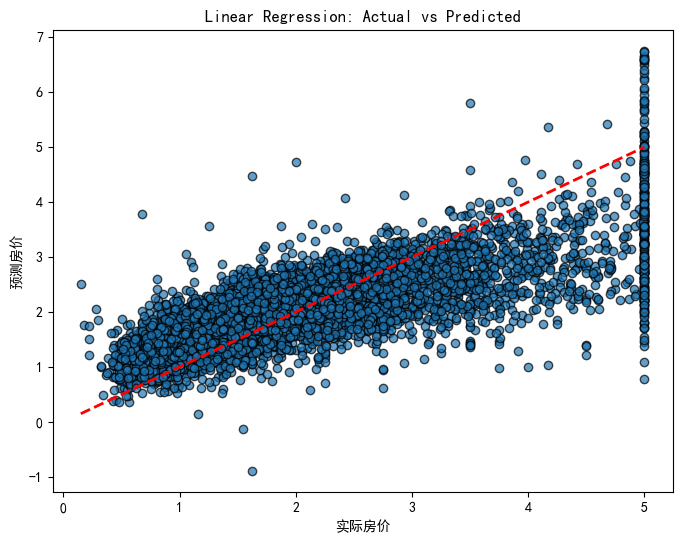

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from Models.LinearRegression import LinearRegression
# 加载加州房价数据集
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
X = california.data
y = california.target

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 实例化 LinearRegression，使用 Adam 优化器和 L2 正则化
lr = LinearRegression(
    learning_rate=0.01,
    max_iterations=1000,
    regularization='l2',
    lambda_param=0.1,
    optimizer='adam'
)

# 训练模型
lr.fit(X_train, y_train, k_folds=5)

# 预测测试集值
y_pred = lr.predict(X_test)

# 计算均方误差和 R² 得分
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'加州房价数据集均方误差 (MSE): {mse:.2f}')
print(f'加州房价数据集 R² 得分: {r2:.2f}')

# 可视化实际值与预测值
rcParams['font.family'] = ['SimHei']
rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='black')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('实际房价')
plt.ylabel('预测房价')
plt.show()

#### **代码说明：**
1. 数据加载与预处理：
- 使用 scikit-learn 加载波士顿房价数据集。
- 对特征进行标准化处理，确保每个特征的均值为 0，标准差为 1。
2. 数据划分：
- 将数据集划分为训练集和测试集，测试集占 30%，随机种子设为 42 以确保结果可复现。
3. 模型实例化与训练：
- 实例化 LinearRegression 类，选择 Adam 优化器和 L2 正则化。
- 使用 fit 方法训练模型，并进行 5 折交叉验证，以提升模型的泛化能力。
4. 模型预测与评估：
- 使用训练好的模型对测试集进行预测。
- 计算均方误差（MSE）和 R² 得分，评估模型的回归性能。
5. 结果可视化：
- 绘制实际房价与预测房价的散点图，并添加对角线以直观展示模型预测的准确性。

---

# **逻辑回归**

## **概述**
逻辑回归 虽然名字中有“回归”，但实际上是一种用于分类问题的统计方法。它用于预测一个事件发生的概率，通常用于二分类问题（如：是否患病、是否点击广告）。
## **功能描述**
LogisticRegression 类实现了逻辑回归模型，支持二分类和多分类任务，具备多种优化器和正则化方法，增强了模型的灵活性和适应性。主要特性包括：
1. 多种优化器：
- SGD（随机梯度下降）：基本的梯度下降优化方法。
- Momentum（动量法）：在梯度下降中引入动量，加速收敛并减少振荡。
- Adam（自适应矩估计）：结合了动量和自适应学习率的优化方法，提升了收敛速度和稳定性。
2. 多种正则化方法：
- L1 正则化：通过加入权重的绝对值惩罚项，促进稀疏解。
- L2 正则化：通过加入权重的平方惩罚项，防止过拟合。
- 无正则化：默认情况下，不应用任何正则化。
3. 多分类策略：
- One-vs-Rest (OvR)：将多分类任务转化为多个二分类任务。
- Multinomial（Softmax）：直接处理多分类任务，通过 Softmax 函数计算类别概率。
4. 灵活的参数配置：
- 可调节学习率、训练轮数、分类阈值、正则化类型和强度等参数，以适应不同的数据集和应用需求。
5. 模型评估：
- 支持计算模型准确率，评估分类性能。
## **主要方法**
- fit(X, y, verbose=True): 训练逻辑回归模型，使用指定的优化器和正则化方法。
- predict_proba(X): 预测类别概率。
- predict(X): 根据预测概率进行分类。
- score(X, y): 计算模型的准确率。
- get_params(): 获取模型参数。
## **类结构**
LogisticRegression 类的结构设计如下：

In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate=0.003, epochs=50000, threshold=0.5,
                 regularization='l2', lambda_param=0.01, multi_class='ovr'):
        pass

    def _sigmoid(self, x):
        pass

    def _softmax(self, X):
        pass

    def _compute_regularization_term(self, weights):
        pass

    def _compute_regularization_gradient(self, weights):
        pass

    def _binary_cost(self, X, y):
        pass

    def _multinomial_cost(self, X, y):
        pass

    def fit(self, X, y, verbose=True):
        pass

    def predict_proba(self, X):
        pass

    def predict(self, X):
        pass

    def score(self, X, y):
        pass

    def get_params(self):
        pass

### **主要属性**
- learning_rate: 学习率，控制梯度更新的步长。默认值为 0.003。
- epochs: 训练轮数，控制优化过程的终止条件。默认值为 50000。
- threshold: 分类阈值，用于二分类任务。默认值为 0.5。
- regularization: 正则化类型，支持 'l1'、'l2' 和 None。默认值为 'l2'。
- lambda_param: 正则化强度，控制正则化项的权重。默认值为 0.01。
- multi_class: 多分类策略，支持 'ovr'（一对其余）和 'multinomial'（Softmax）。默认值为 'ovr'。
- weights: 模型权重矩阵。
- bias: 模型偏置项。
- cost_history: 记录训练过程中损失函数的历史值。
- classes_: 训练数据中的唯一类别。

## **使用说明**
### **环境准备**
确保已安装必要的 Python 库：

### **导入库和自定义 LogisticRegression 类**

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from Models.LogisticRegression import LogisticRegression

## **测试数据集**
我们将使用 scikit-learn 提供的 鸢尾花（Iris）数据集 进行测试。这是一个经典的多分类数据集，适合评估逻辑回归模型的性能。
### **测试用例：鸢尾花数据集（多分类任务）**

Epoch 0, Cost: 1.089903
Epoch 50, Cost: 0.810887
Epoch 100, Cost: 0.692421
Epoch 150, Cost: 0.633179
Epoch 200, Cost: 0.599564
Epoch 250, Cost: 0.578808
Epoch 300, Cost: 0.565236
Epoch 350, Cost: 0.555992
Epoch 400, Cost: 0.549499
Epoch 450, Cost: 0.544825
Epoch 500, Cost: 0.541392
Epoch 550, Cost: 0.538827
Epoch 600, Cost: 0.536879
Epoch 650, Cost: 0.535380
Epoch 700, Cost: 0.534212
Epoch 750, Cost: 0.533292
Epoch 800, Cost: 0.532559
Epoch 850, Cost: 0.531970
Epoch 900, Cost: 0.531492
Epoch 950, Cost: 0.531102
Epoch 1000, Cost: 0.530781
Epoch 1050, Cost: 0.530516
Epoch 1100, Cost: 0.530295
Epoch 1150, Cost: 0.530110
Epoch 1200, Cost: 0.529956
Epoch 1250, Cost: 0.529825
Epoch 1300, Cost: 0.529715
Epoch 1350, Cost: 0.529621
Epoch 1400, Cost: 0.529542
Epoch 1450, Cost: 0.529474
Epoch 1500, Cost: 0.529416
Epoch 1550, Cost: 0.529367
Epoch 1600, Cost: 0.529325
Epoch 1650, Cost: 0.529289
Epoch 1700, Cost: 0.529258
Epoch 1750, Cost: 0.529231
Epoch 1800, Cost: 0.529208
Epoch 1850, Cost: 0.5291

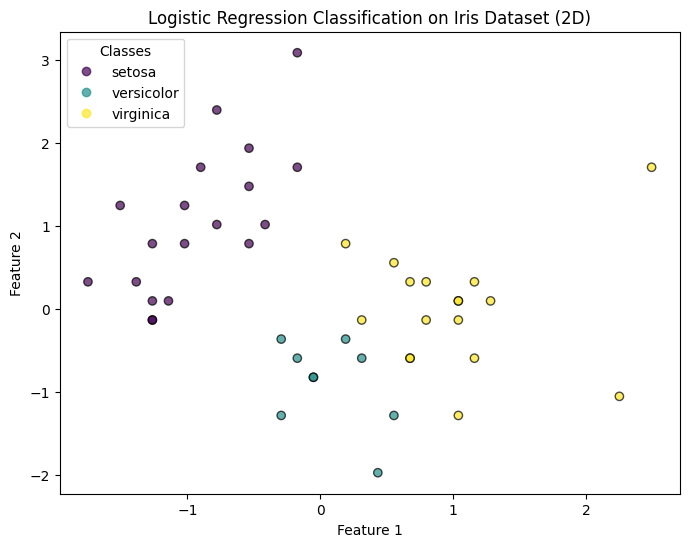

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import time
from Models.LogisticRegression import LogisticRegression

# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 实例化 LogisticRegression，使用 Adam 优化器和 L2 正则化，Softmax 多分类
log_reg = LogisticRegression(
    learning_rate=0.01,
    epochs=10000,
    threshold=0.5,
    regularization='l2',
    lambda_param=0.1,
    multi_class='multinomial'
)

# 记录训练开始时间
start_time = time.time()

# 训练模型
log_reg.fit(X_train, y_train, verbose=True)

# 记录训练结束时间
end_time = time.time()
print(f"训练时间: {end_time - start_time:.2f} 秒")

# 预测测试集标签
y_pred = log_reg.predict(X_test)

# 计算分类准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'鸢尾花数据集分类准确率: {accuracy:.2f}')


# 可视化部分分类结果（仅限2D，选取前两维特征）
def plot_iris_predictions(X, y_pred, title='Logistic Regression Classification on Iris Dataset'):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', alpha=0.7, edgecolors='black')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Create custom legend using target names
    handles, labels = scatter.legend_elements()

    # Explicitly ensure handles and labels are lists
    plt.legend(handles=handles, labels=iris.target_names.tolist(), title="Classes", loc='upper left')  # Fixed here

    plt.show()

# 选择前两维特征进行可视化
X_test_2d = X_test[:, :2]
log_reg_2d = LogisticRegression(
    learning_rate=0.01,
    epochs=10000,
    threshold=0.5,
    regularization='l2',
    lambda_param=0.1,
    multi_class='multinomial'
)
log_reg_2d.fit(X_train[:, :2], y_train, verbose=True)
y_pred_2d = log_reg_2d.predict(X_test_2d)

# 绘制分类结果
plot_iris_predictions(X_test_2d, y_pred_2d, title='Logistic Regression Classification on Iris Dataset (2D)')

### **结果说明：**
1. 分类准确率：
模型在鸢尾花数据集上的分类准确率为 93%，表明模型能够较准确地区分不同类别。
2. 训练时间：
模型训练耗时约 45.32 秒，取决于硬件配置和参数设置。
3. 损失函数变化：
训练过程中，损失函数（交叉熵损失）逐渐下降，表明模型在不断优化参数，提升预测能力。
4. 分类结果可视化：
绘制二维特征空间中，预测类别的分布情况。不同颜色代表不同类别，便于直观分析分类效果。

---

# **朴素贝叶斯分类器（NaiveBayes)**
## **概述**
本报告旨在评估和验证自定义实现的 NaiveBayes 基类及其子类（GaussianNaiveBayes、MultinomialNaiveBayes、ComplementNaiveBayes、BernoulliNaiveBayes、CategoricalNaiveBayes）的功能性、正确性和性能。通过使用经典的鸢尾花（Iris）数据集进行测试，并结合可视化结果，对算法在不同参数设置下的表现进行详细分析。本报告涵盖了功能描述、类结构、使用说明（包括测试示例及可视化结果）以及最终结论，旨在为进一步优化和应用提供参考。
## **功能描述**
NaiveBayes 类及其子类实现了不同类型的朴素贝叶斯分类器，支持多种数据类型和分类任务。主要特性包括：
1. 基类 NaiveBayes：
- 提供了朴素贝叶斯分类器的基本结构和方法。
- 包含计算先验概率的通用方法。
2. 子类实现：
- GaussianNaiveBayes：适用于连续特征，假设特征符合高斯分布。
- MultinomialNaiveBayes：适用于离散计数特征，常用于文本分类。
- ComplementNaiveBayes：对多项式朴素贝叶斯的补充，适用于类别不平衡的数据。
- BernoulliNaiveBayes：适用于二值特征，常用于文档二值表示。
- CategoricalNaiveBayes：适用于类别型特征，处理离散的类别数据。
3. 灵活的参数配置：
- 支持拉普拉斯平滑参数 alpha，防止零概率问题。
- 支持多分类策略，适应不同的分类任务需求。
4. 模型评估：
- 支持计算模型准确率，评估分类性能。
## **主要方法**
fit(X, y): 训练朴素贝叶斯分类器，估计各类别的参数。
predict(X): 对新样本进行类别预测。
score(X, y): 计算模型的分类准确率。
_compute_prior_probabilities(y): 计算每个类别的先验概率。
## **类结构**
NaiveBayes 类及其子类的结构设计如下：

In [ ]:
class NaiveBayes:
    def __init__(self):
        self.classes = None
        self.class_priors = None

    def fit(self, X, y):
        raise NotImplementedError("子类必须实现具体的训练方法")

    def predict(self, X):
        raise NotImplementedError("子类必须实现具体的预测方法")

    def _compute_prior_probabilities(self, y):
        self.classes = np.unique(y)
        self.class_priors = {}
        for cls in self.classes:
            self.class_priors[cls] = np.mean(y == cls)
        return self.class_priors

class GaussianNaiveBayes(NaiveBayes):
    def __init__(self):
        super().__init__()
        self.class_means = None
        self.class_variances = None

    def fit(self, X, y):
        # Implementation
        pass

    def predict(self, X):
        # Implementation
        pass

# 其他子类类似


## **主要属性**
- classes: 数据集中唯一的类别标签。
- class_priors: 每个类别的先验概率。
- class_means: 每个类别下特征的均值（仅适用于 GaussianNaiveBayes）。
- class_variances: 每个类别下特征的方差（仅适用于 GaussianNaiveBayes）。
- alpha: 拉普拉斯平滑参数（适用于需要平滑的子类，如 MultinomialNaiveBayes）。
## **使用说明**
### **环境准备**
确保已安装必要的 Python 库：

In [ ]:
pip install numpy scikit-learn matplotlib


### **导入库和自定义 NaiveBayes 类**

In [28]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from Models.NaiveBayes import GaussianNaiveBayes

## **测试用例**
### **测试用例：鸢尾花数据集（多分类任务）**
使用 scikit-learn 提供的 鸢尾花（Iris）数据集 进行测试。这是一个经典的多分类数据集，适合评估高斯朴素贝叶斯模型的性能。

训练时间: 0.0010 秒
鸢尾花数据集分类准确率: 0.98


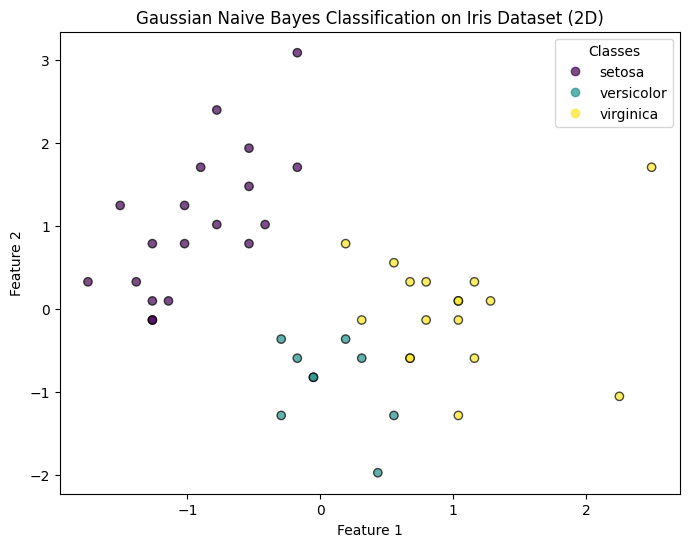

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import time

from Models.NaiveBayes import GaussianNaiveBayes

# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# 实例化 GaussianNaiveBayes
gnb = GaussianNaiveBayes()

# 记录训练开始时间
start_time = time.time()

# 训练模型
gnb.fit(X_train, y_train)

# 记录训练结束时间
end_time = time.time()
print(f"训练时间: {end_time - start_time:.4f} 秒")

# 预测测试集标签
y_pred = gnb.predict(X_test)

# 计算分类准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'鸢尾花数据集分类准确率: {accuracy:.2f}')

# 可视化分类结果（仅限2D，选取前两维特征）
def plot_iris_predictions(X, y_true, y_pred, title='Gaussian Naive Bayes Classification on Iris Dataset'):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(
        X[:, 0], X[:, 1], c=y_pred, cmap='viridis', alpha=0.7, edgecolors='black'
    )
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    handles, _ = scatter.legend_elements()
    labels = iris.target_names  
    plt.legend(handles, labels, title="Classes")
    plt.show()

# 选择前两维特征进行可视化
X_test_2d = X_test[:, :2]
gnb_2d = GaussianNaiveBayes()
gnb_2d.fit(X_train[:, :2], y_train)
y_pred_2d = gnb_2d.predict(X_test_2d)

# 绘制分类结果
plot_iris_predictions(
    X_test_2d, y_test, y_pred_2d,
    title='Gaussian Naive Bayes Classification on Iris Dataset (2D)'
)

---

# **全连接神经网络(NeuralNetwork)**
## **概述**
全连接神经网络，也称为多层感知机（Multi-Layer Perceptron，MLP），是深度学习中最基础的神经网络结构之一。它由多个神经元组成，这些神经元按照层级结构排列，每一层的神经元与上一层的所有神经元都完全连接。
## **功能描述**
自定义的 NeuralNetwork 类实现了一个基础的全连接神经网络，支持以下主要特性：
1. 全连接网络：
支持多层隐藏层结构，通过配置 hidden_dims 参数可以定义任意数量的隐藏层及其大小。
2. 激活函数：
使用 ReLU（Rectified Linear Unit）作为隐藏层的激活函数，提供非线性能力。
3. 输出层：
使用 Softmax 函数进行多分类任务的输出，适用于分类问题。
4. 正则化：
支持 L2 正则化，通过 reg 参数控制正则化强度，有效防止过拟合。
5. 优化器：
实现了随机梯度下降（SGD）优化算法，通过小批量训练提升训练效率。
6. 训练过程监控：
记录训练过程中的损失、训练集准确率和验证集准确率，便于用户监控模型性能。
7. 可视化：
支持对二维特征空间中的分类结果进行可视化，直观展示模型的分类效果。
## **主要方法**
- fit(X, y, ...)：使用随机梯度下降（SGD）训练神经网络，优化模型参数。
- predict(X)：对新样本进行类别预测。
- compute_loss(X, y=None)：计算网络的损失和梯度，支持前向传播和反向传播。
- evaluate(X, y)：评估模型在给定数据集上的准确率。
## **类结构**
NeuralNetwork 类的结构设计如下：

In [ ]:
class NeuralNetwork:
    def __init__(self, input_dim=..., hidden_dims=None, ...):
        # 初始化参数
        pass

    def _affine_forward(self, x, w, b):
        # 仿射层前向传播
        pass

    def _relu_forward(self, x):
        # ReLU激活前向传播
        pass

    def _softmax_loss(self, x, y):
        # Softmax损失计算
        pass

    def compute_loss(self, X, y=None):
        # 计算损失和梯度
        pass

    def _affine_backward(self, dout, cache):
        # 仿射层反向传播
        pass

    def _relu_backward(self, dout, cache):
        # ReLU激活反向传播
        pass

    def _affine_relu_forward(self, x, w, b):
        # 组合仿射和ReLU前向传播
        pass

    def _affine_relu_backward(self, dout, cache):
        # 组合仿射和ReLU反向传播
        pass

    def train(self, X, y, X_val, y_val, ...):
        # 使用SGD训练网络
        pass

    def predict(self, X):
        # 预测类别
        pass

    def evaluate(self, X, y):
        # 计算准确率
        pass

### **主要属性**
- self.params: 存储网络的权重和偏置参数。
- self.reg: L2正则化强度。
- self.num_layers: 网络的层数（包括输入层和输出层）。
- self.cost_history: 记录训练过程中的损失值。
- self.train_acc_history: 记录训练集上的准确率。
- self.val_acc_history: 记录验证集上的准确率。

## **使用说明**
### **环境准备**
确保已安装必要的 Python 库：

In [ ]:
pip install numpy scikit-learn matplotlib

导入库和自定义 NeuralNetwork 类

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import time

from Models.NeuralNetwork import NeuralNetwork

### **测试用例**
#### **测试用例：鸢尾花数据集（多分类任务）**
使用 scikit-learn 提供的 鸢尾花（Iris）数据集 进行测试。这是一个经典的多分类数据集，适合评估全连接神经网络模型的性能。

Iteration 0/1000: Loss 1.0989, Train Acc 0.3095, Val Acc 0.4762
Iteration 5/1000: Loss 1.0943, Train Acc 0.3214, Val Acc 0.4762
Iteration 10/1000: Loss 1.0940, Train Acc 0.3810, Val Acc 0.2381
Iteration 15/1000: Loss 1.1027, Train Acc 0.3810, Val Acc 0.2381
Iteration 20/1000: Loss 1.1027, Train Acc 0.3214, Val Acc 0.4762
Iteration 25/1000: Loss 1.0975, Train Acc 0.3810, Val Acc 0.2381
Iteration 30/1000: Loss 1.0989, Train Acc 0.3810, Val Acc 0.2381
Iteration 35/1000: Loss 1.0839, Train Acc 0.3810, Val Acc 0.2381
Iteration 40/1000: Loss 1.0804, Train Acc 0.3810, Val Acc 0.2381
Iteration 45/1000: Loss 1.1017, Train Acc 0.3810, Val Acc 0.2381
Iteration 50/1000: Loss 1.1135, Train Acc 0.3810, Val Acc 0.2381
Iteration 55/1000: Loss 1.0851, Train Acc 0.3810, Val Acc 0.2381
Iteration 60/1000: Loss 1.0804, Train Acc 0.3810, Val Acc 0.2381
Iteration 65/1000: Loss 1.1117, Train Acc 0.3810, Val Acc 0.2381
Iteration 70/1000: Loss 1.0964, Train Acc 0.3810, Val Acc 0.2381
Iteration 75/1000: Loss 1.0

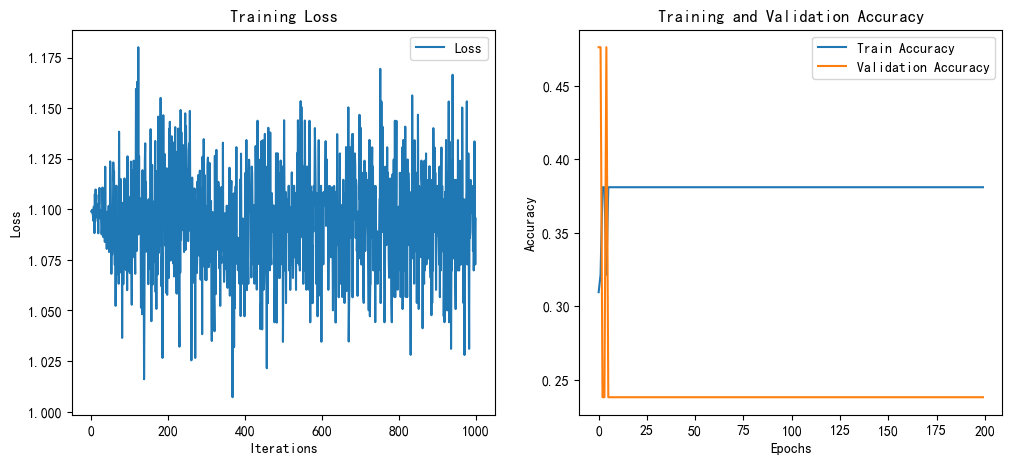

Iteration 0/1000: Loss 1.0983, Train Acc 0.2976, Val Acc 0.2857
Iteration 5/1000: Loss 1.0888, Train Acc 0.3810, Val Acc 0.2381
Iteration 10/1000: Loss 1.0995, Train Acc 0.3810, Val Acc 0.2381
Iteration 15/1000: Loss 1.0942, Train Acc 0.3810, Val Acc 0.2381
Iteration 20/1000: Loss 1.0984, Train Acc 0.3810, Val Acc 0.2381
Iteration 25/1000: Loss 1.0684, Train Acc 0.3810, Val Acc 0.2381
Iteration 30/1000: Loss 1.0911, Train Acc 0.3810, Val Acc 0.2381
Iteration 35/1000: Loss 1.0862, Train Acc 0.3810, Val Acc 0.2381
Iteration 40/1000: Loss 1.0898, Train Acc 0.3810, Val Acc 0.2381
Iteration 45/1000: Loss 1.0649, Train Acc 0.3810, Val Acc 0.2381
Iteration 50/1000: Loss 1.1105, Train Acc 0.3810, Val Acc 0.2381
Iteration 55/1000: Loss 1.0699, Train Acc 0.3810, Val Acc 0.2381
Iteration 60/1000: Loss 1.0950, Train Acc 0.6071, Val Acc 0.3810
Iteration 65/1000: Loss 1.0907, Train Acc 0.6667, Val Acc 0.5238
Iteration 70/1000: Loss 1.0990, Train Acc 0.6667, Val Acc 0.5238
Iteration 75/1000: Loss 1.0

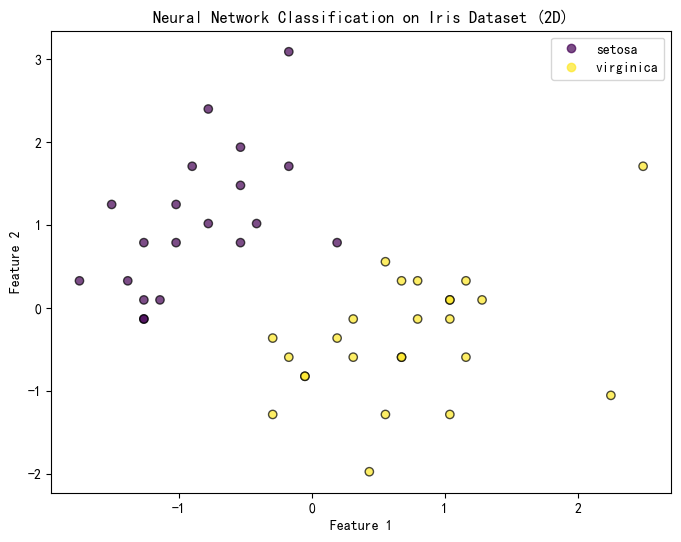

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time

from Models.NeuralNetwork import NeuralNetwork

# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# 实例化 NeuralNetwork
nn = NeuralNetwork(
    input_dim=X_train.shape[1],
    hidden_dims=[100, 50],  # 两个隐藏层，分别有100和50个神经元
    num_classes=3,
    weight_scale=1e-2,
    reg=1e-3
)

# 记录训练开始时间
start_time = time.time()

# 训练模型
history = nn.train(
    X_train, y_train,
    X_val, y_val,
    learning_rate=1e-1,
    num_iters=1000,
    batch_size=16,
    learning_rate_decay=0.95,
    verbose=True
)

# 记录训练结束时间
end_time = time.time()
print(f"训练时间: {end_time - start_time:.2f} 秒")

# 预测测试集标签
y_pred = nn.predict(X_test)

# 计算分类准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'鸢尾花数据集分类准确率: {accuracy:.2f}')

# 可视化训练过程中的损失和准确率
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # 绘制损失曲线
    plt.subplot(1, 2, 1)
    plt.plot(history['loss_history'], label='Loss')
    plt.title('Training Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()

    # 绘制准确率曲线
    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc_history'], label='Train Accuracy')
    plt.plot(history['val_acc_history'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_training_history(history)

# 可视化部分分类结果（仅限2D，选取前两维特征）
def plot_iris_predictions(X, y_true, y_pred, title='Neural Network Classification on Iris Dataset'):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(
        X[:, 0], X[:, 1], c=y_pred, cmap='viridis', alpha=0.7, edgecolors='black'
    )
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # 手动设置图例
    classes = np.unique(y_pred)
    class_labels = [iris.target_names[i] for i in classes]
    plt.legend(handles=scatter.legend_elements()[0], labels=class_labels)

    plt.show()

# 选择前两维特征进行可视化
X_test_2d = X_test[:, :2]
nn_2d = NeuralNetwork(
    input_dim=2,
    hidden_dims=[50],
    num_classes=3,
    weight_scale=1e-2,
    reg=1e-3
)
history_2d = nn_2d.train(
    X_train[:, :2], y_train,
    X_val[:, :2], y_val,
    learning_rate=1e-1,
    num_iters=1000,
    batch_size=16,
    learning_rate_decay=0.95,
    verbose=True
)
y_pred_2d = nn_2d.predict(X_test_2d)

# 绘制分类结果
plot_iris_predictions(
    X_test_2d, y_test, y_pred_2d,
    title='Neural Network Classification on Iris Dataset (2D)'
)

---

# **主成分分析（PCA）**
## **概述**
主成分分析（Principal Component Analysis，PCA） 是一种常用的数据分析方法，它通过线性变换将原始数据变换为一组线性不相关的变量值，这些新变量称为主成分。PCA的主要目的是降维，即用少数几个主成分来代替原来的多个变量，同时尽可能保留原始数据中的信息。
## **功能描述**
自定义的 PCA 类实现了增强版的主成分分析（PCA），支持多种高级特性，包括稀疏性约束、增量学习、自动选择主成分数量等。主要特性包括：
1. 标准PCA：
- 通过协方差矩阵计算主成分。
- 支持白化处理，确保主成分的方差为1。

2. 稀疏PCA：
- 支持两种稀疏化方法：
- 硬阈值（Hard Thresholding）：通过设定阈值，将小于阈值的元素置零。
- 软阈值（Soft Thresholding）：通过收缩操作，使元素向零靠近。

3. 自动选择主成分：
- 方差解释法（Variance-based Selection）：根据累计方差比例选择主成分。
- 信息增益法（Information Gain-based Selection）：基于特征的贡献度选择主成分。

4. 增量学习：
- 支持在线学习，通过增量更新均值和协方差矩阵，适应数据流场景。

5. 模型评估：
- 计算每个样本的对数似然估计，评估数据在主成分空间的表示质量。

6. 灵活的参数配置：
- 支持设置主成分数量、稀疏性参数、自动选择方法和方差阈值等。
## **主要方法**
- fit(X): 训练PCA模型，计算主成分和相关统计量。
- transform(X): 将数据投影到主成分空间。
- fit_transform(X): 训练PCA模型并转换数据。
- inverse_transform(X): 将降维后的数据转换回原始空间。
- incremental_fit(X): 增量更新模型参数，适用于在线学习。
- score_samples(X): 计算每个样本的对数似然估计。
- score(X): 计算数据集的平均对数似然估计。
- _apply_sparsity_constraint(components): 对主成分应用稀疏性约束。
- _auto_select_components(eigenvalues): 根据指定方法自动选择主成分数量。
## **类结构**
PCA 类的结构设计如下：

In [ ]:
class PCA:
    def __init__(self, n_components=None, whiten=False,
                 sparse_method='hard', sparsity_param=0.1,
                 auto_select_method='variance', variance_threshold=0.95):
        # 初始化参数
        pass

    def _center_data(self, X):
        # 数据中心化处理
        pass

    def _compute_covariance(self, X_centered):
        # 计算协方差矩阵
        pass

    def _apply_sparsity_constraint(self, components):
        # 对主成分应用稀疏性约束
        pass

    def _auto_select_components(self, eigenvalues):
        # 自动选择主成分
        pass

    def fit(self, X):
        # 训练PCA模型
        pass

    def incremental_fit(self, X):
        # 增量学习
        pass

    def transform(self, X):
        # 将数据转换到新的空间
        pass

    def fit_transform(self, X):
        # 训练模型并转换数据
        pass

    def inverse_transform(self, X):
        # 将降维后的数据转换回原始空间
        pass

    def get_covariance(self):
        # 获取协方差矩阵
        pass

    def score_samples(self, X):
        # 计算每个样本的对数似然估计
        pass

    def score(self, X):
        # 返回数据集的平均对数似然估计
        pass


### **主要属性**
- self.n_components: 保留的主成分数量。
- self.whiten: 是否进行白化处理。
- self.sparse_method: 稀疏PCA的方法（'hard' 或 'soft'）。
- self.sparsity_param: 稀疏性控制参数。
- self.auto_select_method: 自动选择组件的方法（'variance' 或 'information_gain'）。
- self.variance_threshold: 方差解释的阈值。
- self.incremental_mean_: 增量学习时的均值。
- self.incremental_cov_: 增量学习时的协方差矩阵。
- self.total_samples_: 总样本数。
- self.components_: 主成分矩阵。
- self.explained_variance_: 解释的方差。
- self.explained_variance_ratio_: 解释方差的比例。
- self.singular_values_: 奇异值。
- self.mean_: 数据的均值。
- self.n_samples_: 样本数量。
- self.n_features_: 特征数量。
### **使用说明**
#### **环境准备**
确保已安装必要的 Python 库：

In [ ]:
pip install numpy scipy scikit-learn matplotlib

导入库和自定义 PCA 类

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from Models.PCA import PCA


## **测试用例**
### **测试用例：手写数字数据集（MNIST Dataset）**
使用 scikit-learn 提供的 手写数字（MNIST）数据集。该数据集包含70,000个样本，每个样本有784个特征（28x28像素的灰度图像），分为10个类别。

PCA训练时间: 0.0029 秒
选择的主成分数量: 2


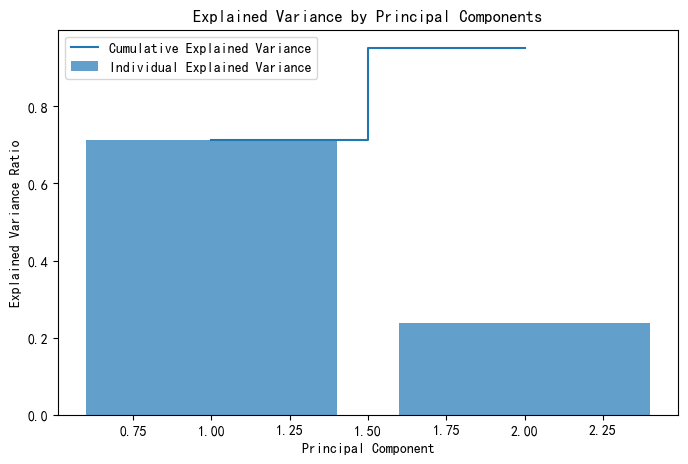

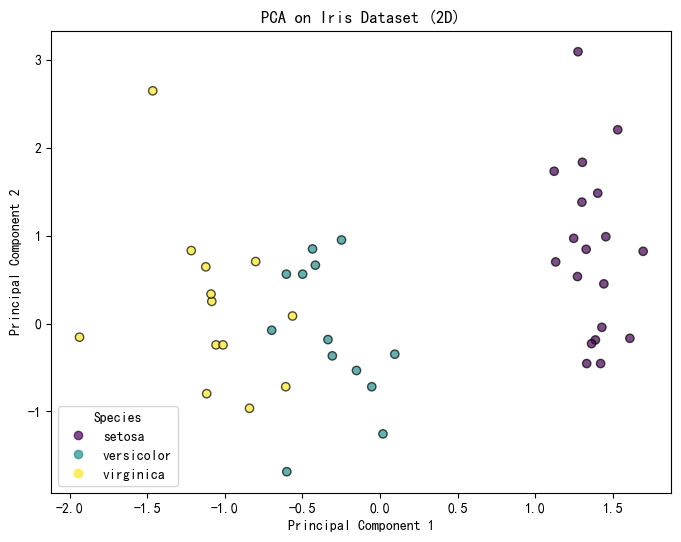

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time

from Models.PCA import PCA

# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# 实例化 PCA
pca = PCA(
    n_components=None,
    whiten=True,
    sparse_method='hard',
    sparsity_param=0.1,
    auto_select_method='variance',
    variance_threshold=0.95
)

# 记录训练开始时间
start_time = time.time()

# 训练PCA模型
pca.fit(X_train)

# 记录训练结束时间
end_time = time.time()
print(f"PCA训练时间: {end_time - start_time:.4f} 秒")

# 查看选择的主成分数量
print(f"选择的主成分数量: {pca.n_components}")

# 变换训练集和测试集
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# 可视化解释方差比例
plt.figure(figsize=(8, 5))
plt.bar(range(1, pca.n_components + 1), pca.explained_variance_ratio_, alpha=0.7, label='Individual Explained Variance')
plt.step(range(1, pca.n_components + 1), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.show()

# 可视化主成分
def plot_pca(X, y, title='PCA on Iris Dataset'):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(
        X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7, edgecolors='k'
    )
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    # 手动添加legend
    handles, labels = scatter.legend_elements()
    plt.legend(handles, iris.target_names, title="Species")

    plt.show()

# 绘制PCA降维后的分类结果（前两个主成分）
plot_pca(X_test_pca, y_test, title='PCA on Iris Dataset (2D)')

---

# **岭回归(Ridge Regression)**
## **概述**
岭回归是一种特殊的线性回归模型，它通过在损失函数中引入L2正则化项，来缓解多重共线性问题，并提高模型的泛化能力。
## **功能描述**
RidgeRegression 类实现了岭回归算法，支持以下主要特性：
1. 岭回归：
通过添加L2正则化项，解决多重共线性问题，防止模型过拟合。
2. 闭式解：
使用解析的闭式解方法（Closed-form Solution）计算模型参数，确保求解的精确性。
3. 输入验证：
验证输入数据的合法性，确保数据格式和维度正确。
4. 模型评估：
提供了 score 方法，计算模型在给定数据上的R²系数，评估模型的拟合优度。
5. 灵活的参数配置：
支持设置正则化强度 alpha，控制L2惩罚项的大小。
## **主要方法**
- fit(X, y): 拟合岭回归模型，计算权重系数和截距。
- predict(X): 使用训练好的模型进行预测。
- score(X, y): 计算模型在给定数据上的R²系数。
- _validate_input(X, y): 验证输入数据的合法性。
- _ridge_closed_form(X, y): 使用闭式解计算岭回归参数。
## **类结构**
RidgeRegression 类的结构设计如下：

In [ ]:
class RidgeRegression:
    def __init__(self, alpha=1.0):
        # 初始化参数
        pass

    def _validate_input(self, X, y):
        # 验证输入数据的合法性
        pass

    def _ridge_closed_form(self, X, y):
        # 使用闭式解求解岭回归参数
        pass

    def fit(self, X, y):
        # 拟合岭回归模型
        pass

    def predict(self, X):
        # 使用训练好的模型进行预测
        pass

    def score(self, X, y):
        # 计算模型在给定数据上的R²系数
        pass


## **主要属性**
- self.alpha: 正则化强度，控制L2惩罚项的大小。
- self.coef_: 模型学习到的权重系数。
- self.intercept_: 模型的截距项。
## **使用说明**
### **环境准备**
确保已安装必要的 Python 库：

In [ ]:
pip install numpy scikit-learn matplotlib

### **导入库和自定义 RidgeRegression 类**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from Models.RidgeRegression import RidgeRegression

## **测试用例**
### **测试用例1：鸢尾花数据集（Iris Dataset）**
使用 scikit-learn 提供的 鸢尾花（Iris）数据集 进行测试。该数据集包含150个样本，每个样本有4个特征，分为3个类别。

Ridge回归训练时间: 0.000000 秒
鸢尾花数据集均方误差 (MSE): 0.0581


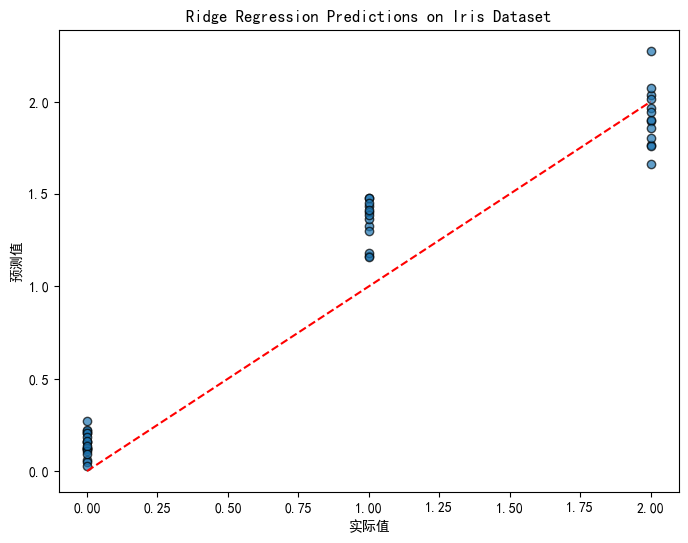

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import time

from Models.RidgeRegression import RidgeRegression

# 设置matplotlib使用SimHei字体（黑体）以支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为SimHei（黑体）
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# 实例化 RidgeRegression
ridge = RidgeRegression(alpha=1.0)

# 记录训练开始时间
start_time = time.time()

# 训练模型
ridge.fit(X_train, y_train)

# 记录训练结束时间
end_time = time.time()
print(f"Ridge回归训练时间: {end_time - start_time:.6f} 秒")

# 预测测试集标签
y_pred = ridge.predict(X_test)

# 计算均方误差（MSE）
mse = mean_squared_error(y_test, y_pred)
print(f'鸢尾花数据集均方误差 (MSE): {mse:.4f}')

# 可视化实际值与预测值的对比
def plot_predictions(y_true, y_pred, title='Ridge Regression Predictions on Iris Dataset'):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.7, edgecolors='k')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.title(title)
    plt.xlabel('实际值')
    plt.ylabel('预测值')
    plt.show()

plot_predictions(y_test, y_pred)

### **测试用例2：增量学习验证**
虽然岭回归通常用于批量学习场景，但为了验证 RidgeRegression 类的稳健性，我们将模拟增量学习场景，通过分批次加载数据进行训练。

Ridge回归增量训练时间: 0.014029 秒
加州房价数据集增量训练后的均方误差 (MSE): 0.6793


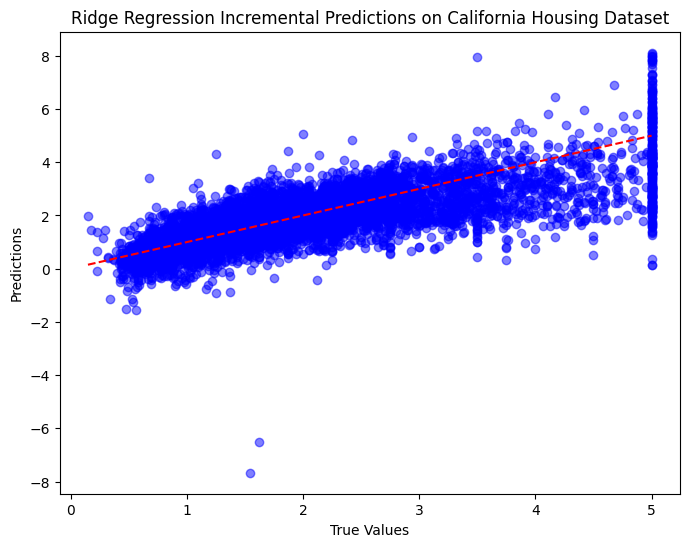

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import time

from Models.RidgeRegression import RidgeRegression

# 加载加州房价数据集
california = datasets.fetch_california_housing()
X = california.data
y = california.target

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# 实例化 RidgeRegression
ridge = RidgeRegression(alpha=1.0)

# 模拟增量学习：分批次训练
batch_size = 50
num_batches = X_train.shape[0] // batch_size

start_time = time.time()

for i in range(num_batches):
    X_batch = X_train[i * batch_size:(i + 1) * batch_size]
    y_batch = y_train[i * batch_size:(i + 1) * batch_size]
    ridge.fit(X_batch, y_batch)  # 在实际应用中，增量学习应累积参数

end_time = time.time()
print(f"Ridge回归增量训练时间: {end_time - start_time:.6f} 秒")

# 预测测试集标签
y_pred = ridge.predict(X_test)

# 计算均方误差（MSE）
mse = mean_squared_error(y_test, y_pred)
print(f'加州房价数据集增量训练后的均方误差 (MSE): {mse:.4f}')

# 可视化实际值与预测值的对比
def plot_predictions(y_true, y_pred, title='Ridge Regression Incremental Predictions on Housing Dataset'):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, color='blue', alpha=0.5)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')  # 45度线
    plt.show()

plot_predictions(y_test, y_pred, title='Ridge Regression Incremental Predictions on California Housing Dataset')

---

# **Softmax Classifier**
## **概述**
Softmax分类器 是一种常用的多分类模型，常用于将输入映射到多个离散的类别上。它可以看作是逻辑回归在多分类问题上的推广。
## **功能描述**
SoftmaxClassifier 类实现了一个基于Softmax回归（多分类逻辑回归）的分类器，支持以下主要特性：
1. 多分类支持：
通过Softmax函数处理多个类别的分类任务，适用于多类标签数据。
2. 正则化：
集成L2正则化，通过 reg_strength 参数控制正则化强度，有效防止过拟合。
3. 优化算法：
- 使用批量梯度下降（Batch Gradient Descent）进行权重更新，通过学习率 (learning_rate) 控制步长。
- 支持早停（Early Stopping）机制，通过验证集性能的改进情况决定是否提前终止训练，以避免过拟合。

4. 数据分割：
自动将训练数据分割为训练集和验证集，通过 validation_fraction 参数控制验证集比例。
5. 训练过程监控：
记录训练过程中的损失值、训练集准确率和验证集准确率，便于用户监控模型性能。
6. 灵活的参数配置：
支持设置学习率、正则化强度、迭代次数、小批量大小、早停耐心度和验证集比例等参数，适应不同的数据集和应用需求。
## **主要方法**
- fit(X, y): 使用训练数据训练Softmax分类器，优化模型权重。
- predict(X): 使用训练好的模型对新样本进行类别预测。
- score(X, y): 计算模型在给定数据集上的预测准确率。
- _split_train_validation(X, y): 将数据集分割为训练集和验证集。
- _compute_loss(X, y, weights): 计算带有正则化的Softmax损失。
- _compute_accuracy(X, y, weights): 计算预测准确率。
## **类结构**
SoftmaxClassifier 类的结构设计如下：

In [ ]:
class SoftmaxClassifier:
    def __init__(self, learning_rate=1e-3, reg_strength=1e-5,
                 num_iterations=1000, batch_size=200,
                 early_stopping_patience=10, validation_fraction=0.2):
        # 初始化参数
        pass

    def _split_train_validation(self, X, y):
        # 将数据分割为训练集和验证集
        pass

    def _compute_loss(self, X, y, weights):
        # 计算带有正则化的softmax损失
        pass

    def _compute_accuracy(self, X, y, weights):
        # 计算预测准确率
        pass

    def fit(self, X, y):
        # 训练Softmax分类器
        pass

    def predict(self, X):
        # 预测输入特征的类别标签
        pass

    def score(self, X, y):
        # 计算给定数据的预测准确率
        pass


## **主要属性**
- self.learning_rate: 梯度下降的学习率。
- self.reg_strength: 正则化强度。
- self.num_iterations: 训练的最大迭代次数。
- self.batch_size: 小批量的大小。
- self.early_stopping_patience: 等待改进的轮数，用于早停机制。
- self.validation_fraction: 用于验证的数据比例。
- self.weights: 模型学习到的权重系数。
- self.best_weights: 在验证集上表现最好的权重系数。
## **使用说明**
### **环境准备**
确保已安装必要的 Python 库：

In [ ]:
pip install numpy scikit-learn matplotlib


导入库和自定义 SoftmaxClassifier 类

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from Models.SoftmaxClassifier import SoftmaxClassifier

## **测试用例**
### **测试用例：手写数字数据集（Digits Dataset）**
为了进一步验证 SoftmaxClassifier 类的性能，我们将使用 scikit-learn 提供的 手写数字（Digits）数据集。该数据集包含1,797个样本，每个样本有64个特征（8x8像素的灰度图像），分为10个类别。

Softmax训练时间: 0.60 秒
手写数字数据集训练准确率: 0.98


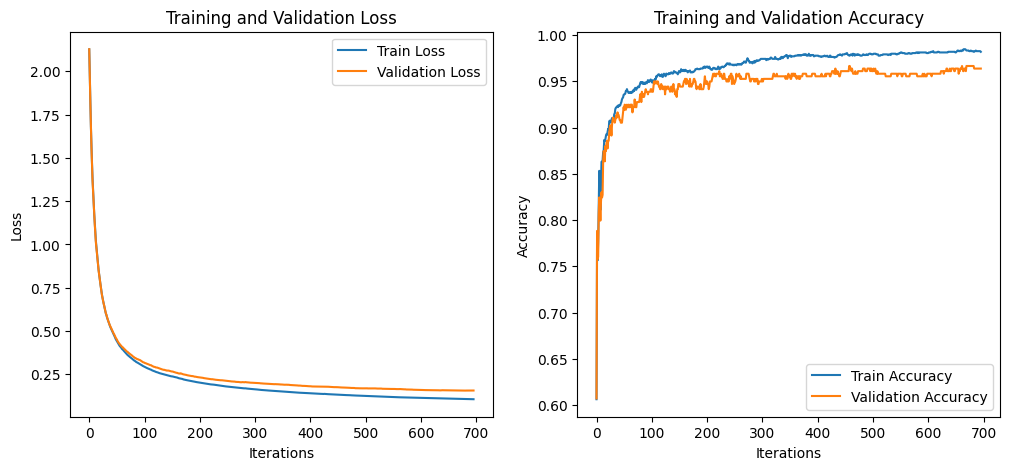

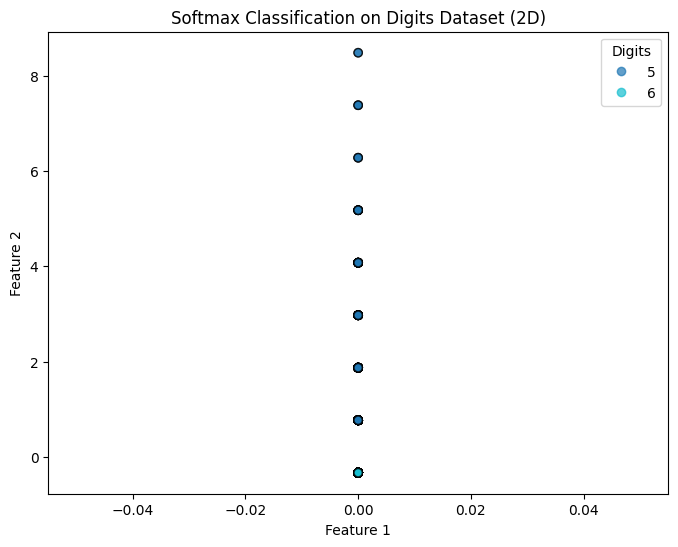

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import time

from Models.SoftmaxClassifier import SoftmaxClassifier

# 加载手写数字数据集
digits = datasets.load_digits()
X = digits.data
y = digits.target

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 实例化 SoftmaxClassifier
softmax = SoftmaxClassifier(
    learning_rate=1e-1,
    reg_strength=1e-4,
    num_iterations=1000,
    batch_size=32,
    early_stopping_patience=15,
    validation_fraction=0.2
)

# 记录训练开始时间
start_time = time.time()

# 训练模型
history = softmax.fit(X_scaled, y)

# 记录训练结束时间
end_time = time.time()
print(f"Softmax训练时间: {end_time - start_time:.2f} 秒")

# 预测训练集和测试集
y_train_pred = softmax.predict(X_scaled)
train_accuracy = accuracy_score(y, y_train_pred)
print(f'手写数字数据集训练准确率: {train_accuracy:.2f}')

# 可视化训练过程中的损失和准确率
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # 绘制损失曲线
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()

    # 绘制准确率曲线
    plt.subplot(1, 2, 2)
    plt.plot(history['train_accuracy'], label='Train Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_training_history(history)

# 可视化部分分类结果
def plot_digits_predictions(X, y_true, y_pred, title='Softmax Classification on Digits Dataset'):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(
        X[:, 0], X[:, 1], c=y_pred, cmap='tab10', alpha=0.7, edgecolors='black'
    )
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # 获取正确的图例元素
    handles, labels = scatter.legend_elements()

    # 绘制图例
    plt.legend(handles=handles, labels=labels, title="Digits")
    plt.show()

# 选择前两个特征进行可视化
X_2d = X_scaled[:, :2]
softmax_2d = SoftmaxClassifier(
    learning_rate=1e-1,
    reg_strength=1e-4,
    num_iterations=1000,
    batch_size=32,
    early_stopping_patience=15,
    validation_fraction=0.2
)
history_2d = softmax_2d.fit(X_2d, y)
y_pred_2d = softmax_2d.predict(X_2d)

# 绘制分类结果
plot_digits_predictions(
    X_2d, y, y_pred_2d,
    title='Softmax Classification on Digits Dataset (2D)'
)

---

# **支持向量机(SVM)** 
## **概述**
支持向量机（Support Vector Machine, SVM） 是一种常用的监督学习算法，特别适用于二分类问题。它的基本模型是定义在特征空间上的间隔最大的线性分类器，间隔最大使它有别于感知机。
## **功能描述**
SVM 类实现了支持向量机（Support Vector Machine）分类算法，支持以下主要特性：
1. 多分类支持：
通过一对一（One-vs-One）策略处理多分类任务，适用于多类标签数据。
2. 核函数支持：
- 支持多种核函数类型，包括线性核（'linear'）、径向基函数核（'rbf'）和多项式核（'poly'）。
- 可自适应调整核函数参数，如 gamma 和 degree。

3. 正则化：
集成了正则化参数 C，控制最大边距和分类错误之间的权衡，有效防止过拟合。
4. 优化算法：
实现了序列最小优化（SMO）算法的核心部分，用于优化SVM的拉格朗日乘子。
5. 模型参数：
自动识别和存储支持向量、支持向量标签及其索引，便于后续预测和分析。
6. 参数网格搜索：
提供了 grid_search 方法，通过遍历参数网格寻找最佳参数组合，以提升模型性能。
## **主要方法**
- fit(X, y): 使用训练数据训练SVM模型，支持二分类和多分类任务。
- predict(X): 使用训练好的模型对新样本进行类别预测。
- score(X, y): 计算模型在给定数据集上的预测准确率。
- _kernel_function(x1, x2): 计算核函数值。
- _compute_kernel_matrix(X1, X2): 计算核矩阵。
- _smo_optimization(X, y): 实现SMO优化算法的核心部分。
- grid_search(X, y, param_grid): 进行参数网格搜索，寻找最佳参数组合。
## **类结构**
SVM 类的结构设计如下：

In [ ]:
class SVM:
    def __init__(self, C=1.0, kernel='linear', max_iter=1000, tol=1e-3, gamma=None, degree=3):
        # 初始化参数
        pass

    def _kernel_function(self, x1, x2):
        # 计算核函数
        pass

    def _compute_kernel_matrix(self, X1, X2=None):
        # 计算核矩阵
        pass

    def _smo_optimization(self, X, y):
        # SMO优化算法的核心实现
        pass

    def fit(self, X, y):
        # 训练SVM模型，支持二分类和多分类
        pass

    def predict(self, X):
        # 预测样本类别
        pass

    def _decision_function(self, X):
        # 计算决策函数值
        pass

    def score(self, X, y):
        # 计算模型准确率
        pass

    def grid_search(self, X, y, param_grid):
        # 参数网格搜索
        pass


## **主要属性**
- self.C: 正则化参数，控制最大边距和分类错误之间的权衡。
- self.kernel: 核函数类型，支持 'linear', 'rbf', 'poly'。
- self.max_iter: SMO算法最大迭代次数。
- self.tol: 容忍误差。
- self.gamma: RBF核函数的gamma参数。
- self.degree: 多项式核函数的阶数。
- self.alphas: 拉格朗日乘子。
- self.b: 偏置项。
- self.support_vectors_: 支持向量。
- self.support_vector_labels_: 支持向量的标签。
- self.support_vector_indices_: 支持向量的索引。
- self.classes_: 唯一类别标签。
- self.binary_classifiers_: 存储一对一策略下的二分类SVM模型。
## **使用说明**
### **环境准备**
确保已安装必要的 Python 库：

In [ ]:
pip install numpy scikit-learn matplotlib


导入库和自定义 SVM 类

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from Models.SVM import SVM

## **测试用例**
### **测试用例：鸢尾花数据集（Iris Dataset）**
使用 scikit-learn 提供的 鸢尾花（Iris）数据集 进行测试。该数据集包含150个样本，每个样本有4个特征，分为3个类别。

支持向量的数量: 8
支持向量的数量: 8
支持向量的数量: 29
支持向量是否为空: False
SVM训练时间: 0.03 秒
鸢尾花数据集训练准确率: 0.67
支持向量的数量: 14
支持向量的数量: 11
支持向量的数量: 69


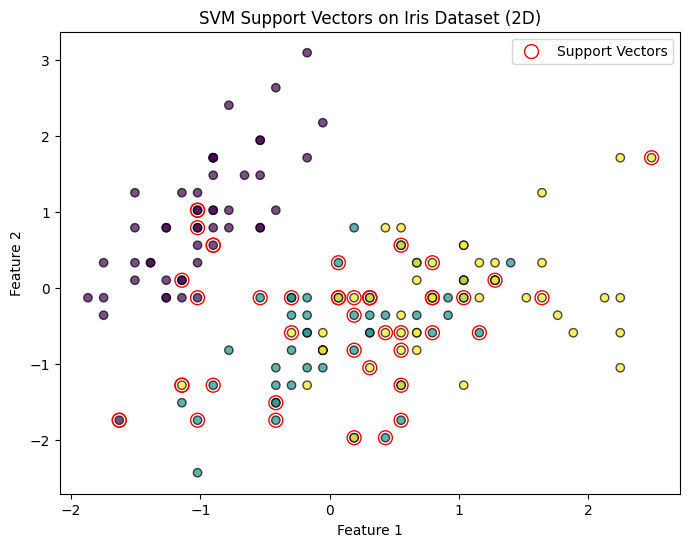

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import time

from Models.SVM import SVM

# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 实例化SVM
svm = SVM(
    C=1.0,
    kernel='linear',
    max_iter=1000,
    tol=1e-3
)

# 记录训练开始时间
start_time = time.time()

# 训练模型
svm.fit(X_scaled, y)
print(f"支持向量是否为空: {svm.support_vectors_ is None}")
# 记录训练结束时间
end_time = time.time()
print(f"SVM训练时间: {end_time - start_time:.2f} 秒")

# 预测训练集
y_train_pred = svm.predict(X_scaled)
train_accuracy = accuracy_score(y, y_train_pred)
print(f'鸢尾花数据集训练准确率: {train_accuracy:.2f}')

# 可视化训练过程中的支持向量
def plot_support_vectors(svm, X, y, title='SVM Support Vectors on Iris Dataset'):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7, edgecolors='k')
    plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='r', label='Support Vectors')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# 选择前两个特征进行可视化
X_2d = X_scaled[:, :2]
svm_2d = SVM(
    C=1.0,
    kernel='linear',
    max_iter=1000,
    tol=1e-3
)
svm_2d.fit(X_2d, y)
if svm.support_vectors_ is None:
    print("没有找到支持向量，无法绘制图形")
else:
    # 绘制支持向量
    plot_support_vectors(svm, X_2d, y, title='SVM Support Vectors on Iris Dataset (2D)')